# Project Discription:

- The Thera bank Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same and any majors to prevent this using the avaible data .



- Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas


# Problem Statment :
- As data scientist  ,my job is to  come up with a  model that will help the bank improve its services so that customers do not renounce their credit cards and provide the bank key insights from avaible data  to improve services.


# Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-- - Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [2]:
#importing the required packages  and  setting up enviornment  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
pd.set_option("display.max_columns",None)
import warnings as warnings
warnings.filterwarnings("ignore")
np.random.set_state=1


In [3]:
# Reading the data from the csv files
cred_data = pd.read_csv("BankChurners.csv")
cred_data.sample(200)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
250   710103558  Existing Customer            50      M                3   
995   717127083  Existing Customer            37      M                3   
1280  710927733  Existing Customer            39      M                1   
8772  721486908  Existing Customer            51      F                5   
5210  718984533  Existing Customer            37      M                3   
...         ...                ...           ...    ...              ...   
6423  720470133  Existing Customer            59      M                0   
2030  711315783  Existing Customer            53      M                3   
301   712890408  Existing Customer            45      M                2   
8763  712955433  Existing Customer            36      F                4   
9577  711160233  Existing Customer            32      M                1   

     Education_Level Marital_Status Income_Category Card_Category  \
250    Post-Graduate         Single         $120K +          Blue   
995         Graduate        Married         $120K +          Blue   
1280             NaN        Married    $80K - $120K          Blue   
8772     High School         Single  Less than $40K          Blue   
5210        Graduate         Single    $80K - $120K          Blue   
...              ...            ...             ...           ...   
6423        Graduate         Single  Less than $40K          Blue   
2030        Graduate        Married     $40K - $60K          Blue   
301       Uneducated        Married     $60K - $80K          Blue   
8763      Uneducated            NaN     $40K - $60K          Blue   
9577     High School        Married     $40K - $60K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
250               31                         4                       1   
995               25                         3                       3   
1280              36                         6                       2   
8772              36                         1                       1   
5210              29                         6                       2   
...              ...                       ...                     ...   
6423              36                         5                       3   
2030              43                         6                       4   
301               36                         5                       3   
8763              16                         1                       2   
9577              19                         2                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
250                       2        3234.0                 1486   
995                       0       15017.0                 1733   
1280                      3        2899.0                 1999   
8772                      1        7645.0                 2076   
5210                      4        7199.0                 1274   
...                     ...           ...                  ...   
6423                      3        3604.0                 1483   
2030                      2        7451.0                  683   
301                       2        2221.0                 1343   
8763                      2        4370.0                 1222   
9577                      1       12024.0                    0   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
250            1748.0                 0.868             1354              28   
995           13284.0                 0.635             2076              58   
1280            900.0                 0.832             1687              35   
8772           5569.0                 0.759             7710              75   
5210           5925.0                 0.639             4552             100   
...               ...                   ...              ...             ...   
6423           2121.0 

In [4]:
#Checking the datatypes and summary of statisitics for the data

print(cred_data.info())
cred_data.describe(include='all').T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

count unique                top  freq  \
CLIENTNUM                 10127.0    NaN                NaN   NaN   
Attrition_Flag              10127      2  Existing Customer  8500   
Customer_Age              10127.0    NaN                NaN   NaN   
Gender                      10127      2                  F  5358   
Dependent_count           10127.0    NaN                NaN   NaN   
Education_Level              8608      6           Graduate  3128   
Marital_Status               9378      3            Married  4687   
Income_Category             10127      6     Less than $40K  3561   
Card_Category               10127      4               Blue  9436   
Months_on_book            10127.0    NaN                NaN   NaN   
Total_Relationship_Count  10127.0    NaN                NaN   NaN   
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN   
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN   
Credit_Limit              10127.0    NaN                NaN   NaN   
Total_Revolving_Bal       10127.0    NaN                NaN   NaN   
Avg_Open_To_Buy           10127.0    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1      10127.0    NaN                NaN   NaN   
Total_Trans_Amt           10127.0    NaN                NaN   NaN   
Total_Trans_Ct            10127.0    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1       10127.0    NaN                NaN   NaN   
Avg_Utilization_Ratio     10127.0    NaN                NaN   NaN   

                                      mean              std          min  \
CLIENTNUM                 739177606.333663  36903783.450231  708082083.0   
Attrition_Flag                         NaN              NaN          NaN   
Customer_Age                      46.32596         8.016814         26.0   
Gender                                 NaN              NaN          NaN   
Dependent_count                   2.346203         1.298908          0.0   
Education_Level                        NaN              NaN          NaN   
Marital_Status                         NaN              NaN          NaN   
Income_Category                        NaN              NaN          NaN   
Card_Category                          NaN              NaN          NaN   
Months_on_book                   35.928409         7.986416         13.0   
Total_Relationship_Count           3.81258         1.554408          1.0   
Months_Inactive_12_mon            2.341167         1.010622          0.0   
Contacts_Count_12_mon             2.455317         1.106225          0.0   
Credit_Limit                   8631.953698       9088.77665       1438.3   
Total_Revolving_Bal            1162.814061       814.987335          0.0   
Avg_Open_To_Buy                7469.139637      9090.685324          3.0   
Total_Amt_Chng_Q4_Q1              0.759941         0.219207          0.0   
Total_Trans_Amt                4404.086304      3397.129254        510.0   
Total_Trans_Ct                   64.858695         23.47257         10.0   
Total_Ct_Chng_Q4_Q1               0.712222         0.238086          0.0   
Avg_Utilization_Ratio             0.274894         0.275691          0.0   

                                  25%          50%          75%          max  
CLIENTNUM                 713036770.5  717926358.0  773143533.0  828343083.0  
Attrition_Flag                    NaN          NaN          NaN          NaN  
Customer_Age                     41.0         46.0         52.0         73.0  
Gender                            NaN          NaN          NaN          NaN  
Dependent_count                   1.0          2.0          3.0          5.0  
Education_Level                   NaN          NaN          NaN          NaN  
Marital_Status                    NaN          NaN          NaN          NaN  
Income_Category                   NaN          NaN          NaN          NaN  
Card_Category                     NaN          NaN          NaN          NaN  
Months_on_book                   31.0         

In [5]:
#checking the categorical varibales top values and percentages

cat_col=[x for x in cred_data.columns if cred_data[x].dtypes=="object"]
for col in cat_col:
    print('*'*50)
    print(f'\n {col} value counts:\n {cred_data[col].value_counts()} \n percent of total : \n  {cred_data[col].value_counts(normalize=True)}')


**************************************************

 Attrition_Flag value counts:
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 
 percent of total : 
  Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
**************************************************

 Gender value counts:
 F    5358
M    4769
Name: Gender, dtype: int64 
 percent of total : 
  F    0.529081
M    0.470919
Name: Gender, dtype: float64
**************************************************

 Education_Level value counts:
 Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 
 percent of total : 
  Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: Education_Level, dtype: float64
**************************************

In [6]:
# Checking the missing values for the data

for col in cred_data.columns:
    if cred_data[col].isna().sum() > 0:
        print(
            f"\n {col} having missing data:{cred_data[col].isna().sum()}\n Percent missing : {cred_data[col].isna().sum()/len(cred_data)}"
        )

    else:
        print(f"\n {col} has no missing data")


 CLIENTNUM has no missing data

 Attrition_Flag has no missing data

 Customer_Age has no missing data

 Gender has no missing data

 Dependent_count has no missing data

 Education_Level having missing data:1519
 Percent missing : 0.14999506270366347

 Marital_Status having missing data:749
 Percent missing : 0.07396069912116125

 Income_Category has no missing data

 Card_Category has no missing data

 Months_on_book has no missing data

 Total_Relationship_Count has no missing data

 Months_Inactive_12_mon has no missing data

 Contacts_Count_12_mon has no missing data

 Credit_Limit has no missing data

 Total_Revolving_Bal has no missing data

 Avg_Open_To_Buy has no missing data

 Total_Amt_Chng_Q4_Q1 has no missing data

 Total_Trans_Amt has no missing data

 Total_Trans_Ct has no missing data

 Total_Ct_Chng_Q4_Q1 has no missing data

 Avg_Utilization_Ratio has no missing data


In [7]:
# checking the duplicates in the data
cred_data.duplicated().sum()

0

#  Observations From  Summary Of Data :

- We have data  of  10127 row entries and  21 Data columns.

- Education Level and maritial_staus having missing values 14% and 7% respectivly .

- No Dupicated value has be observed  in the data set.

- From  the summary statistics we can find that the  CLIENTNUM  has no identifiable staitistcal property and its just unique number which we can delete after EDA checks.

- We can see the lable column  Attrition_Flag has values as text ,which we need to convert to binarly 0 and 1 for classification and ease of model.

- There are few numerical columns which show the data distribution as 
 - - Looks normal distribution :   Age ,Dependent_counts,Months_on_book,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
 
 - - Right skewd distribution :  Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt	
- We can also see some  minimum values as 0 but seems normal but we will validate in EDA.

- Few categorical columns we can convert to One-hot encoding to better suit the modle .

- Follwing are  the top columns for each category which will help to profile the customter along with EDA :

  Attrition_Flag value counts:
  Existing Customer    8500

   Gender value counts:
  F    5358
  
  Education_Level value counts:
  Graduate         3128
  
  Marital_Status value counts:
  Married     4687
  
  Income_Category value counts:
  Less than 40K    3561
  
  Card_Category value counts:
   Blue        9436

- We also find the Discripancy in the  Income_Category which mentioned "abc" which we need to find and impuete with correct values



#  EDA :Univariate analysis - Bivariate analysis - Key meaningful observations

In [8]:
# Function to check the Numerical data distribution and Density
def num_box_hist(col):
    for i in cred_data[col]:
        fig, ax = plt.subplots(2, 1, figsize=(10, 8))
        sns.histplot(ax=ax[0], x=cred_data[i], bins=100)
        ax[0].axvline(cred_data[i].mean(), color="red", linestyle="dashed", linewidth=2)
        ax[0].axvline(
            cred_data[i].median(), color="green", linestyle="dashed", linewidth=2
        )
        # ax[0].axvline(cred_data[i].std(),color="blue",linestyle='dashed',linewidth=2)
        sns.boxplot(ax=ax[1], x=cred_data[i])
        ax[1].axvline(cred_data[i].mean(), color="red", linestyle="dashed", linewidth=2)
        ax[1].axvline(
            cred_data[i].median(), color="green", linestyle="dashed", linewidth=2
        )
        # ax[1].axvline(cred_data[i].std(),color="blue",linestyle='dashed',linewidth=2)
        plt.xticks(rotation=90)
    plt.show()

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


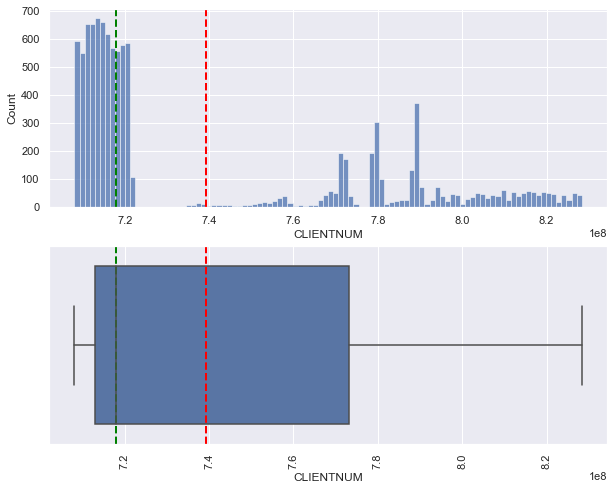

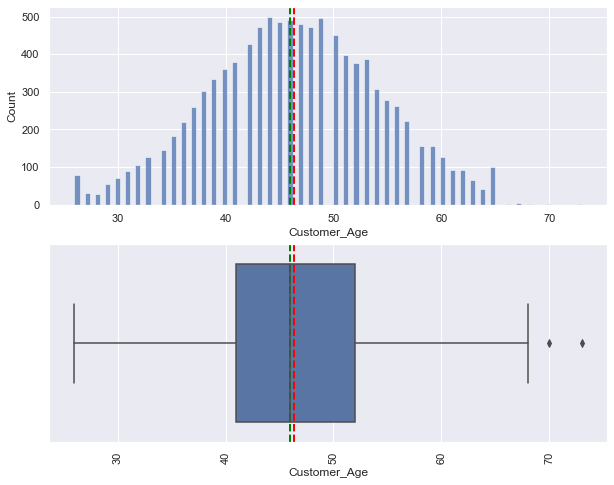

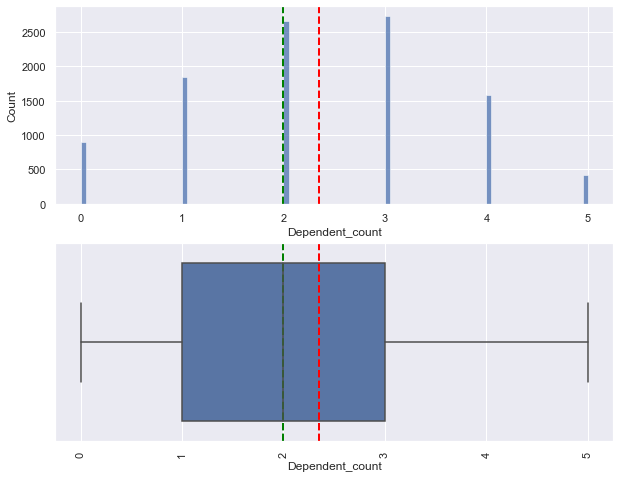

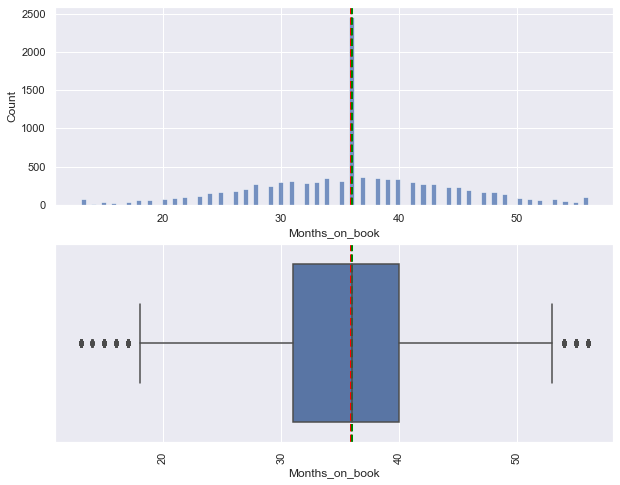

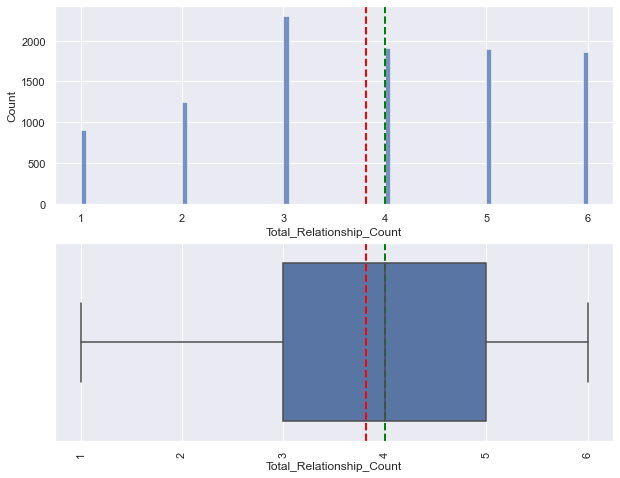

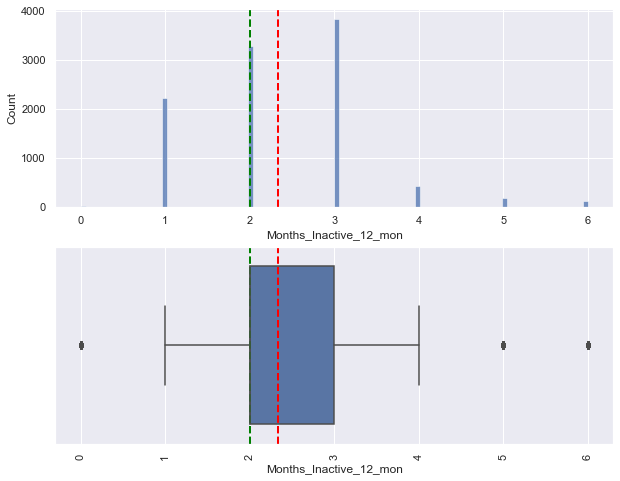

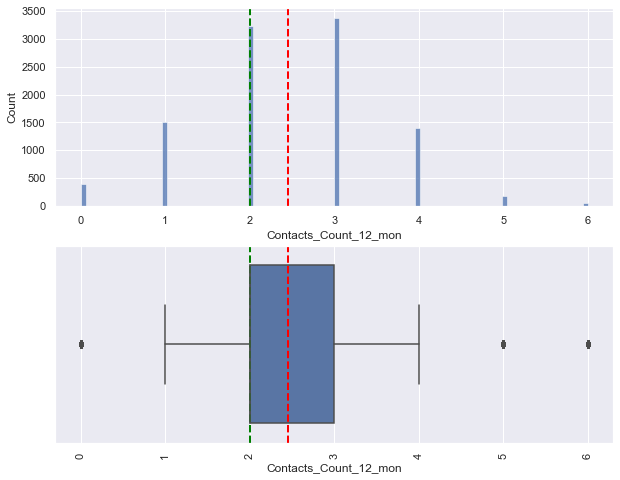

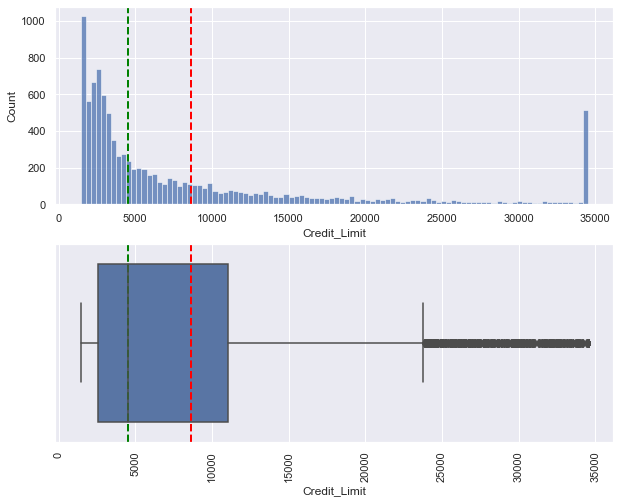

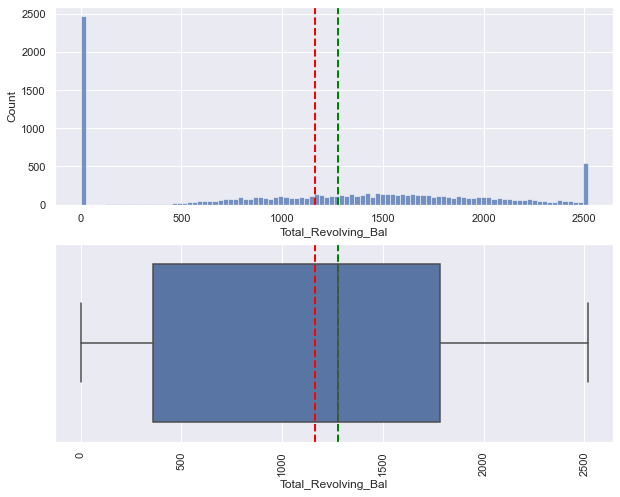

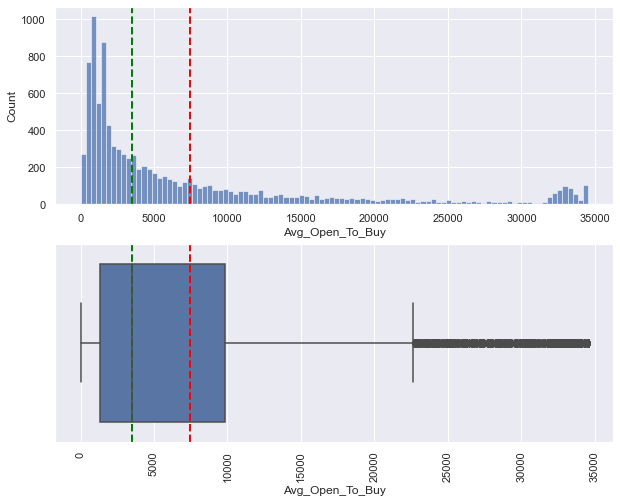

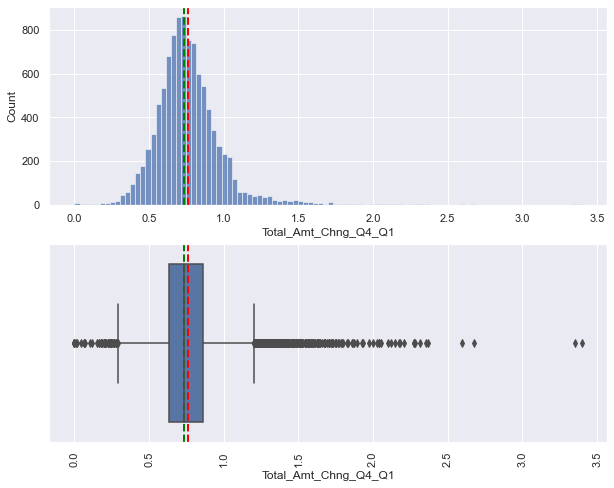

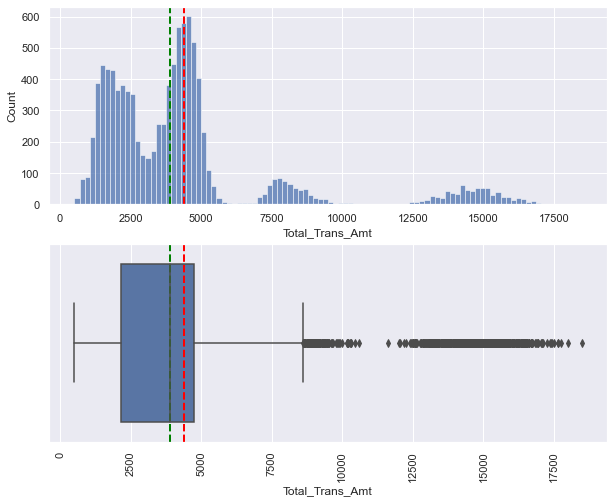

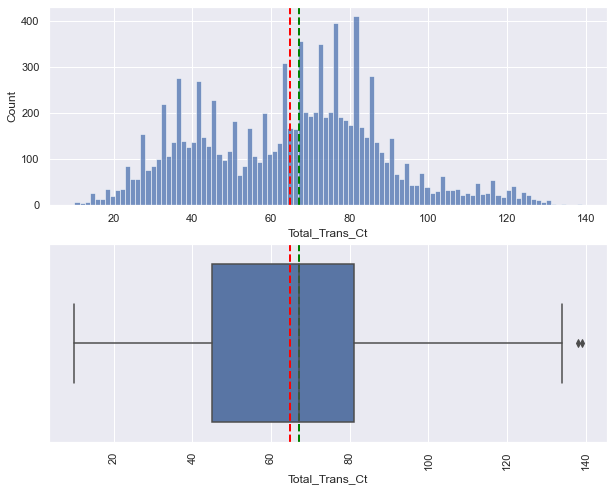

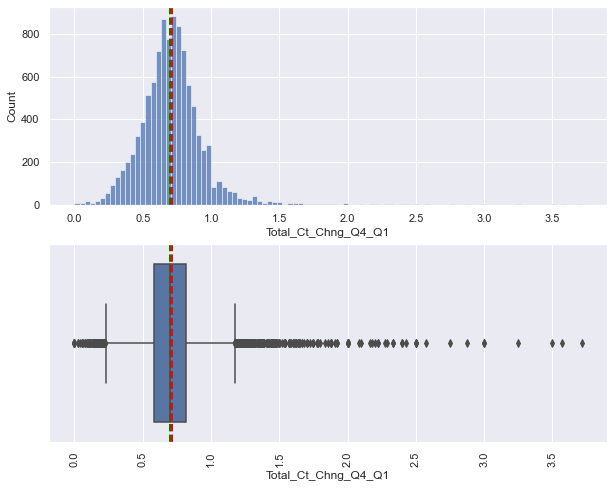

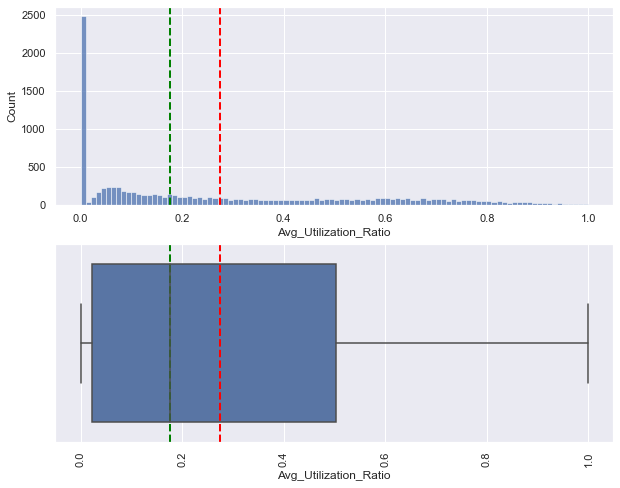

In [9]:
num_col = [x for x in cred_data.columns if cred_data[x].dtypes != "object"]
print(num_col)
num_box_hist(num_col)

In [10]:
# univariate Analysis for the cat columns


def cat_count_bar_box(ca_col):
    for col in cred_data[ca_col]:
        total = len(cred_data[col])
        count = cred_data[col].nunique()
        plt.xticks(rotation=90)
        ax = sns.countplot(
            data=cred_data,
            x=col,
            palette="Paired",
            order=cred_data[col].value_counts().index[:20].sort_values(),
        )
        for p in ax.patches:
            label = (
                "{:.1f}%".format(100 * p.get_height() / total)
                + ", "
                + p.get_height().astype(str)
            )
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )

        plt.show()

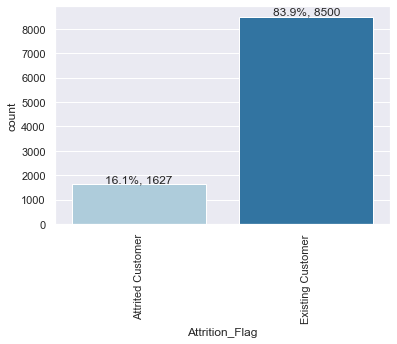

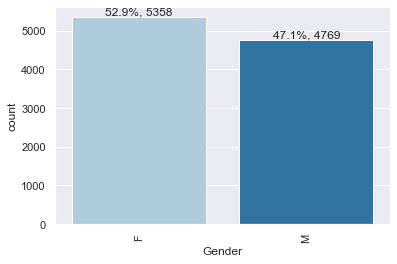

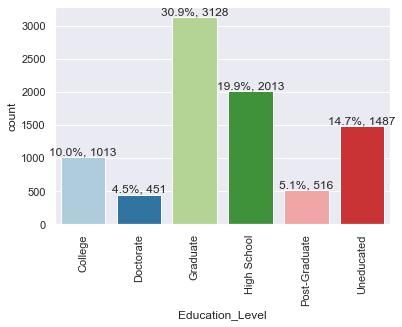

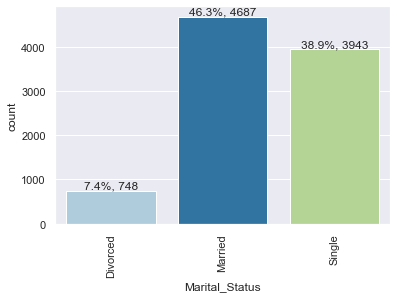

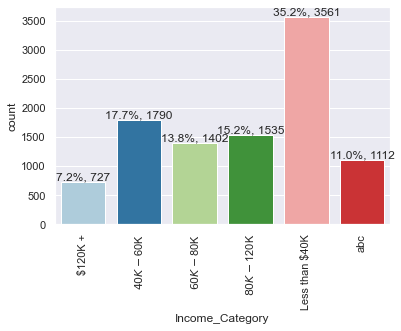

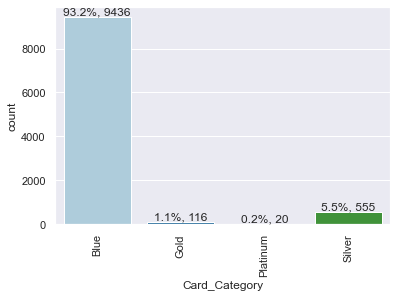

In [11]:
cat_count_bar_box(cat_col)

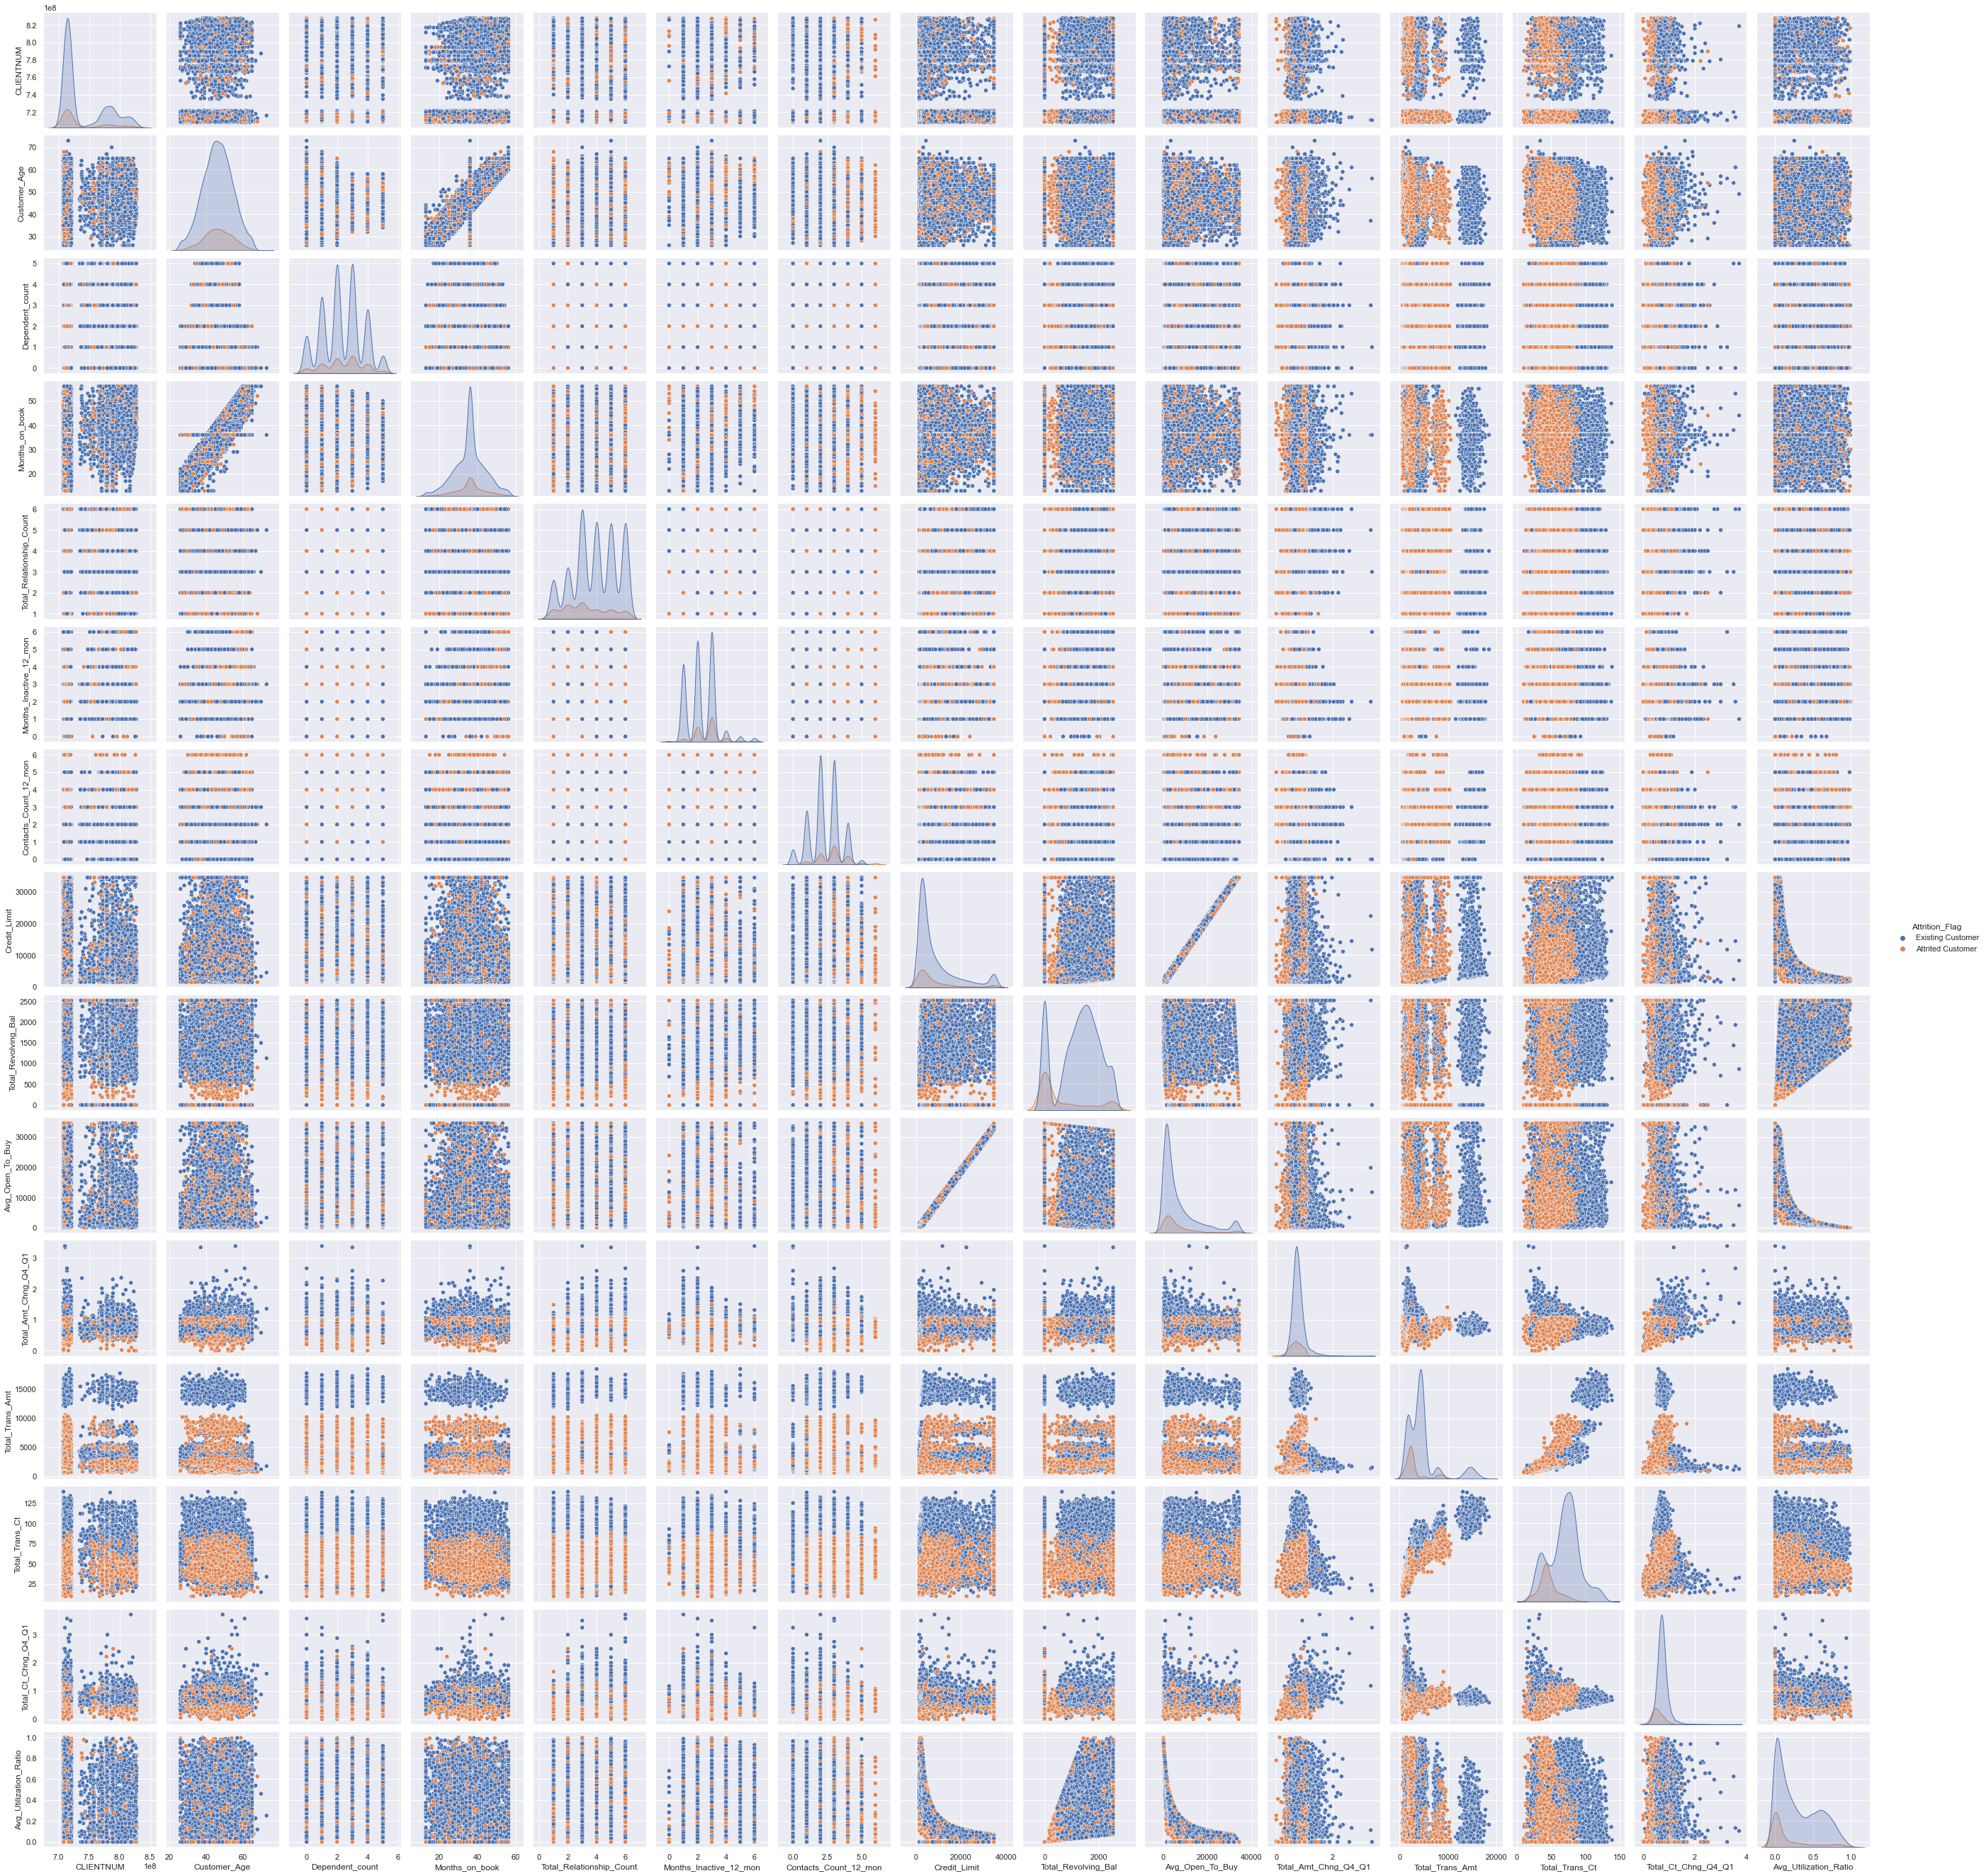

In [12]:
# bi-varaite analysis
sns.pairplot(cred_data, hue="Attrition_Flag")

<Figure size 720x720 with 0 Axes>

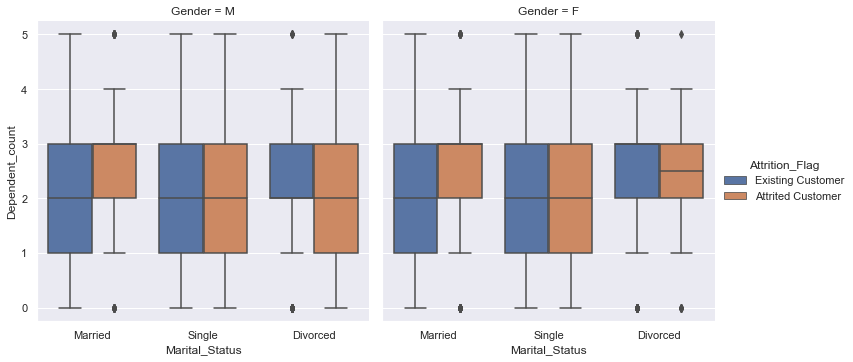

In [13]:
plt.figure(figsize=(10, 10))
sns.catplot(
    x="Marital_Status",
    y="Dependent_count",
    hue="Attrition_Flag",
    col="Gender",
    data=cred_data,
    kind="box",
)
plt.show()

<Figure size 720x720 with 0 Axes>

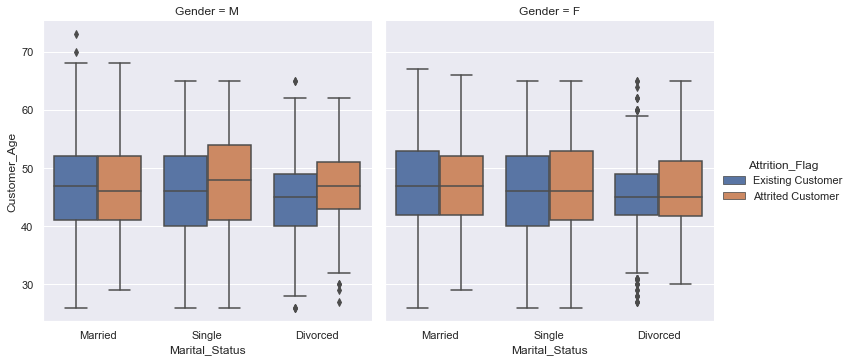

In [14]:
plt.figure(figsize=(10, 10))
sns.catplot(
    x="Marital_Status",
    y="Customer_Age",
    hue="Attrition_Flag",
    col="Gender",
    data=cred_data,
    kind="box",
)
plt.show()

<Figure size 720x720 with 0 Axes>

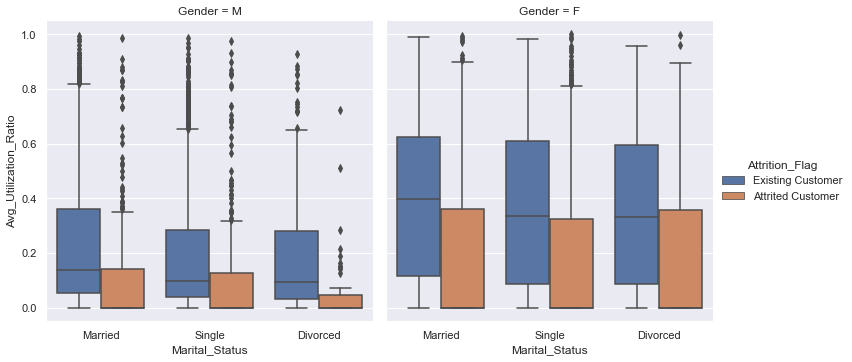

In [15]:
plt.figure(figsize=(10, 10))
sns.catplot(
    x="Marital_Status",
    y="Avg_Utilization_Ratio",
    hue="Attrition_Flag",
    col="Gender",
    data=cred_data,
    kind="box",
)
plt.show()

Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
All                             1627               8500  10127
Existing Customer                  0               8500   8500
------------------------------------------------------------------------------------------------------------------------


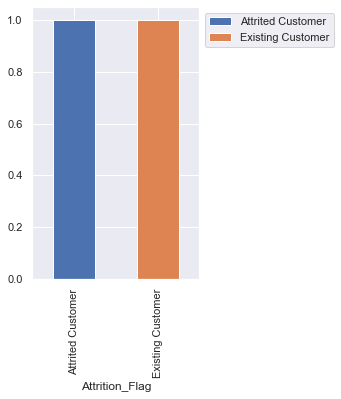

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


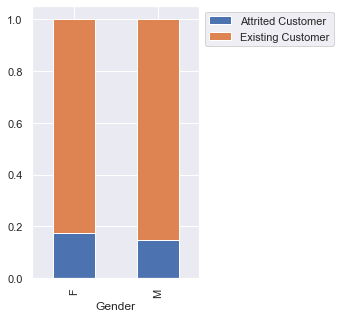

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


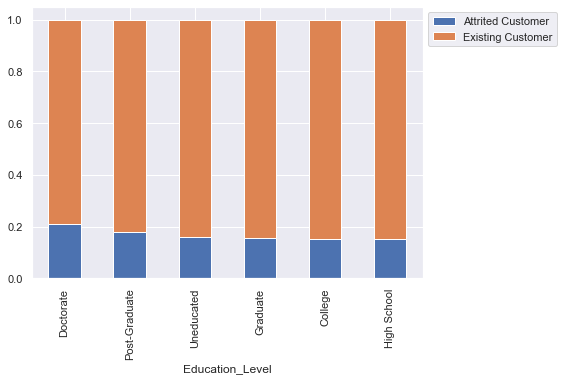

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


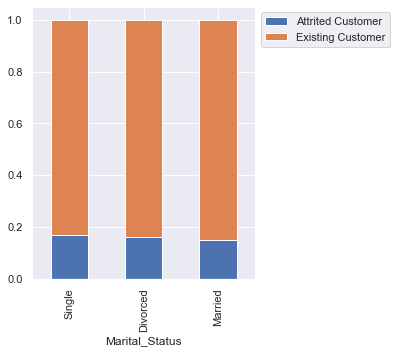

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


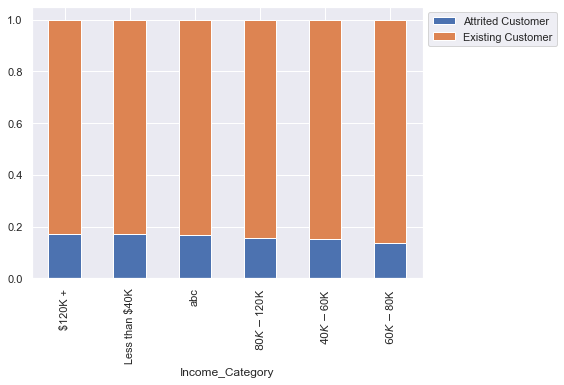

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


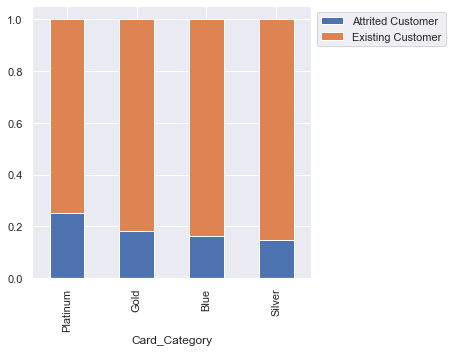

In [16]:
# stack plot to understand the distribution of the data

cred_data_bkp = cred_data.copy()

num_col = [x for x in cred_data.columns if cred_data[x].dtypes != "object"]
# print(num_col)
for col in cred_data[cat_col]:
    count = cred_data[col].nunique()
    sorter = cred_data["Attrition_Flag"].value_counts().index[-1]
    tab1 = pd.crosstab(
        cred_data[col], cred_data["Attrition_Flag"], margins=True
    ).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(
        cred_data[col], cred_data["Attrition_Flag"], normalize="index"
    ).sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<AxesSubplot:>

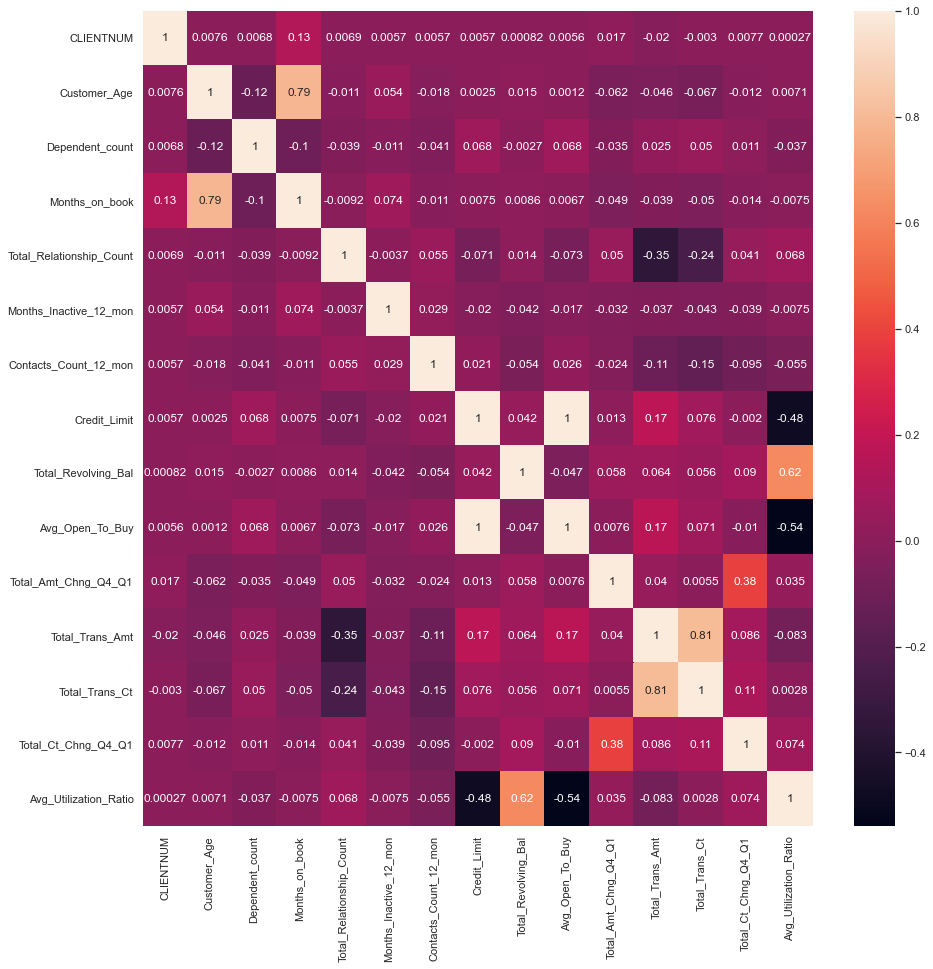

In [17]:
# numerical varible corelattion
plt.figure(figsize=(15, 15))
sns.heatmap(cred_data.corr(), annot=True)

In [18]:
# fundtion to check the distibution for the lable varaible with respect to numerical columns


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

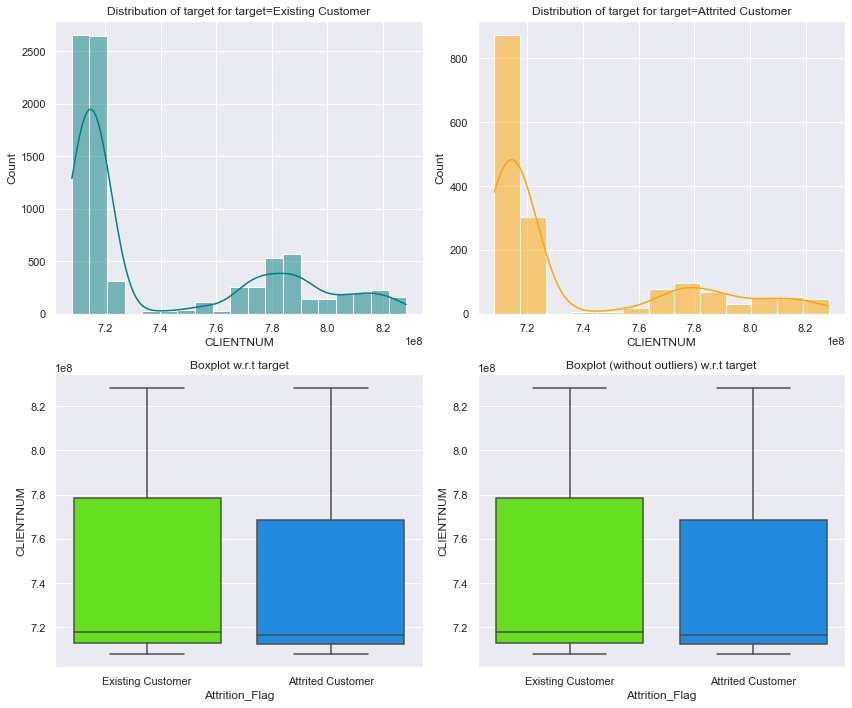

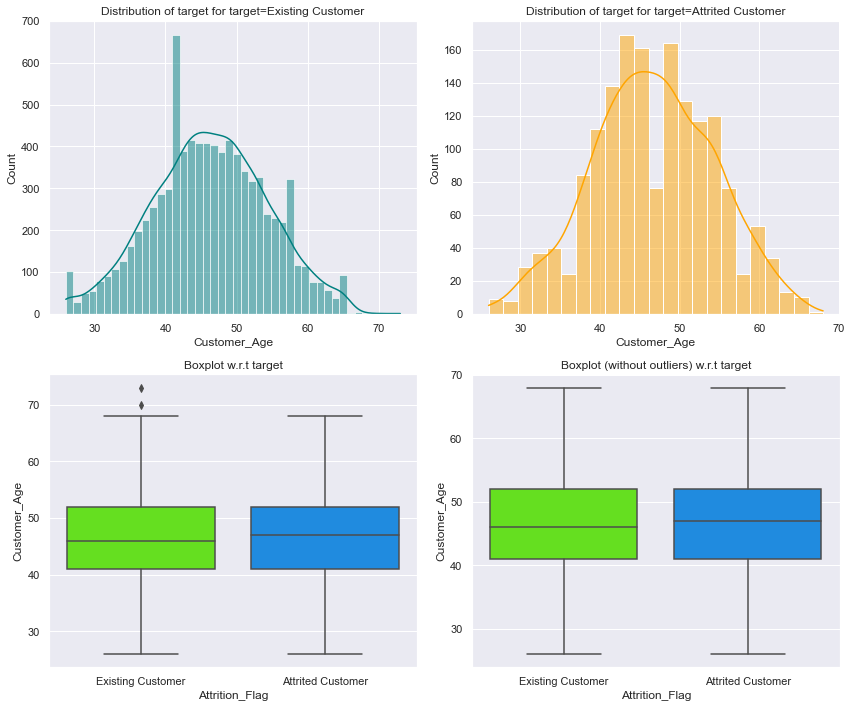

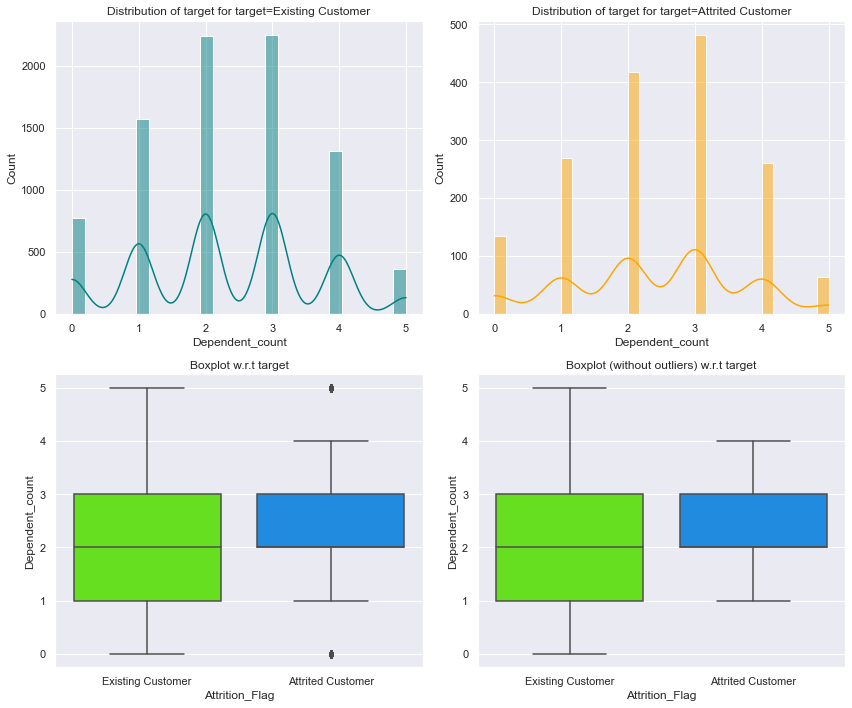

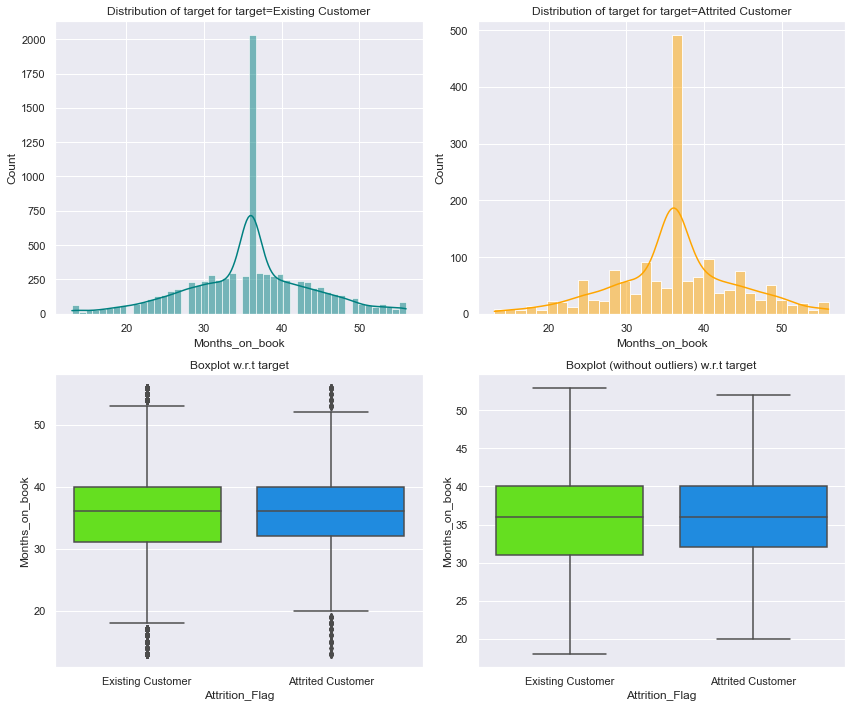

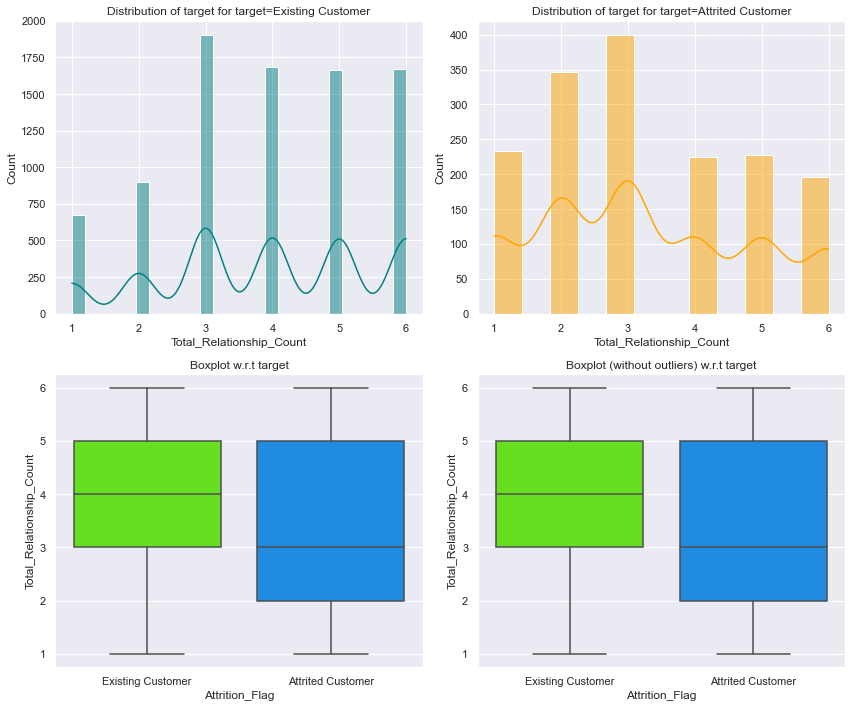

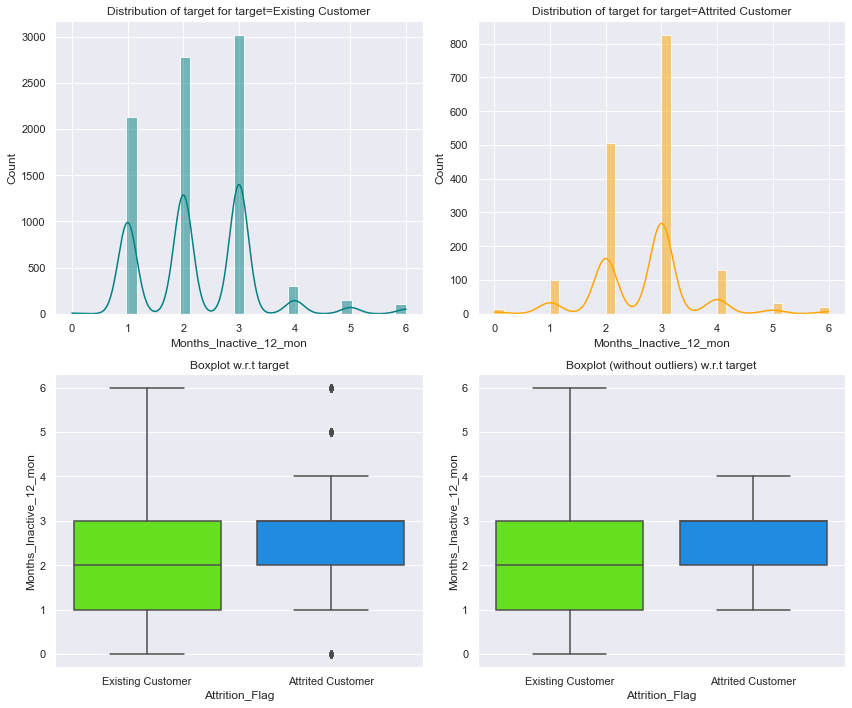

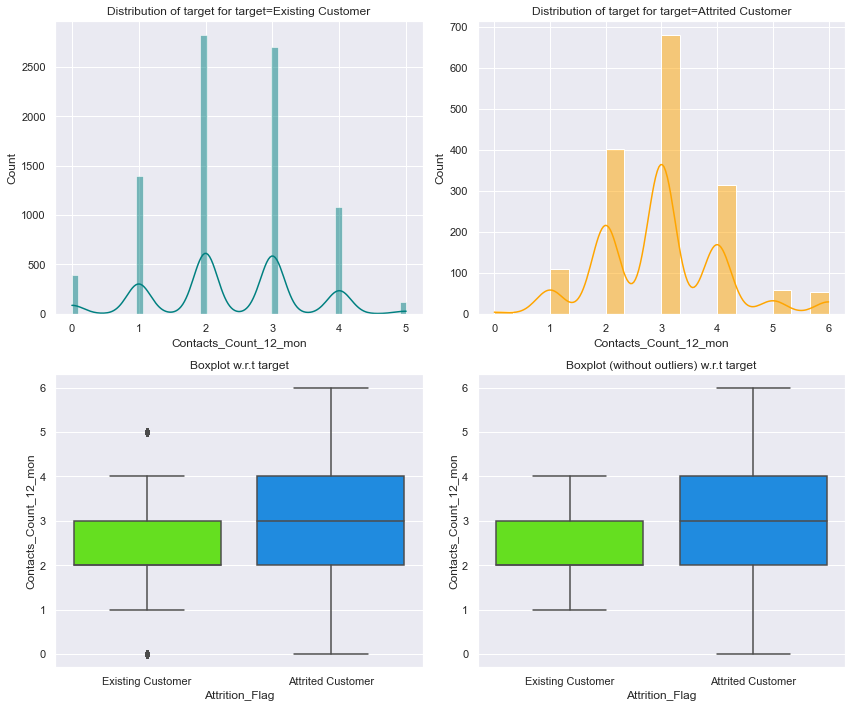

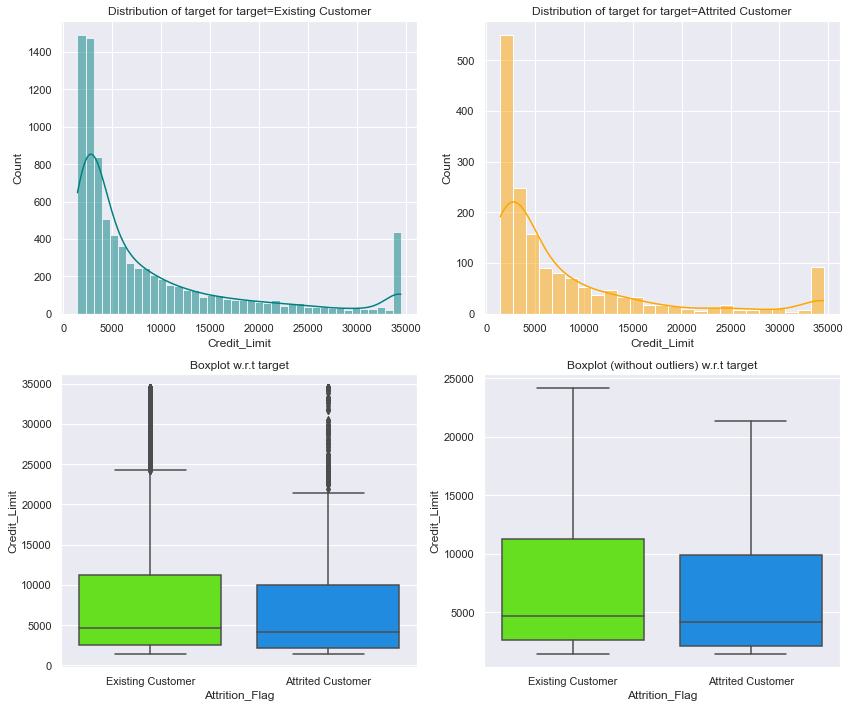

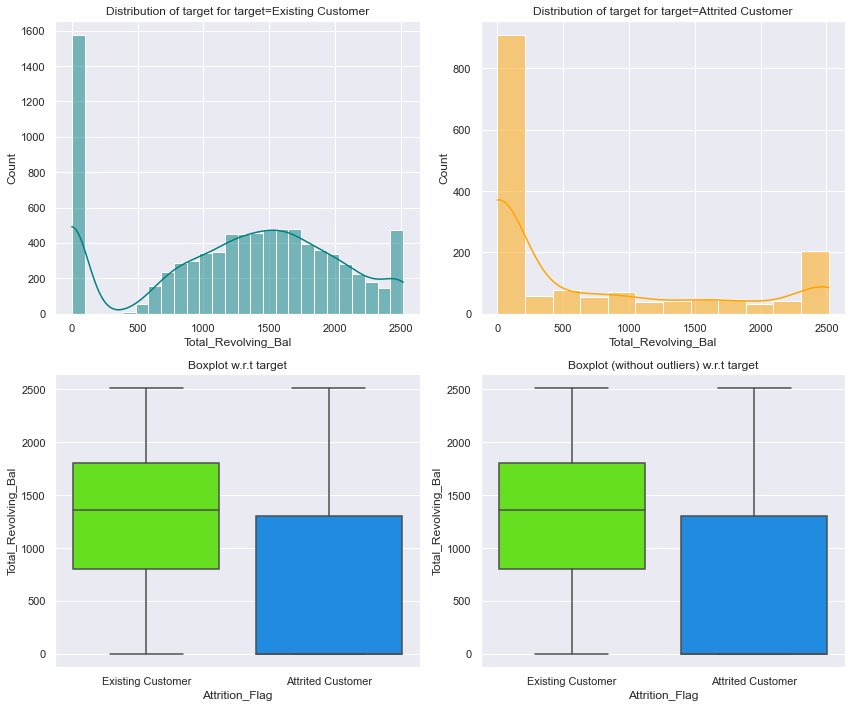

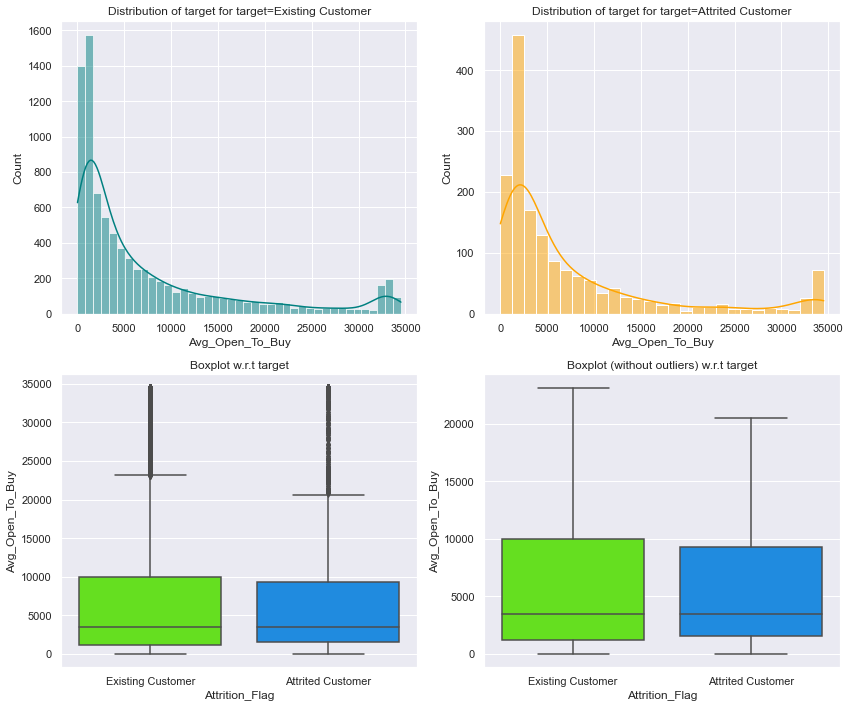

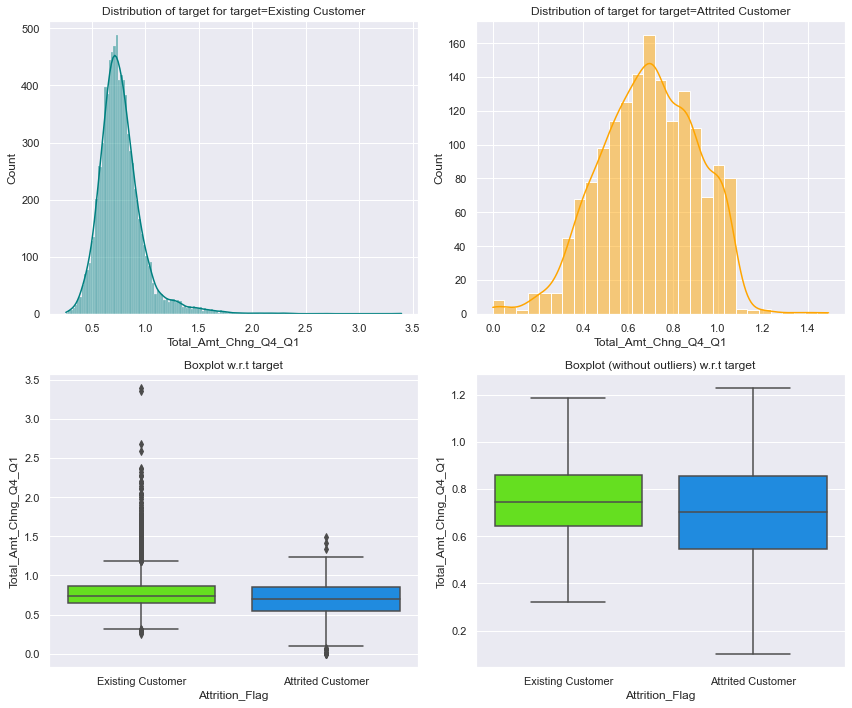

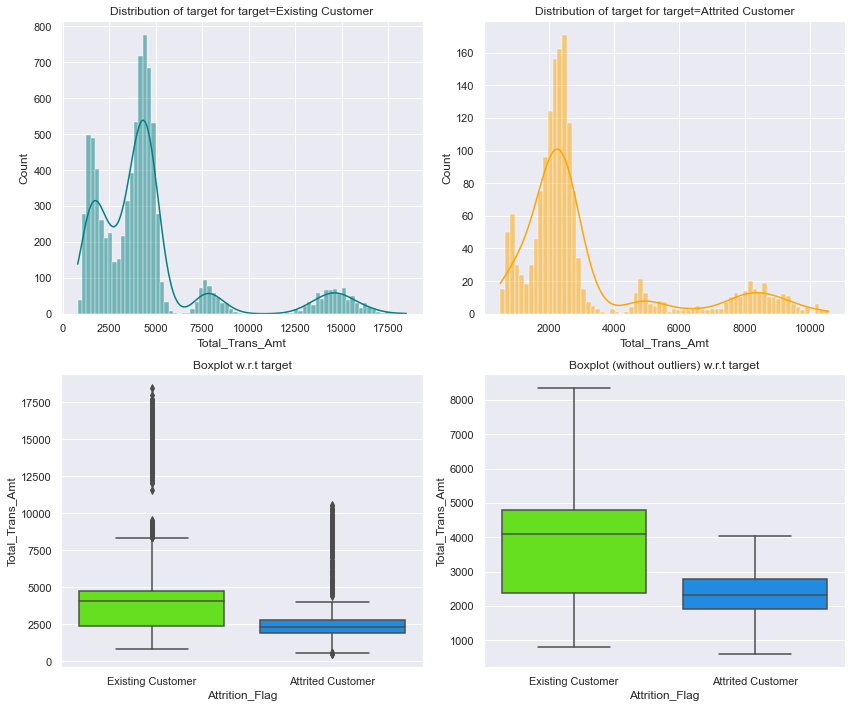

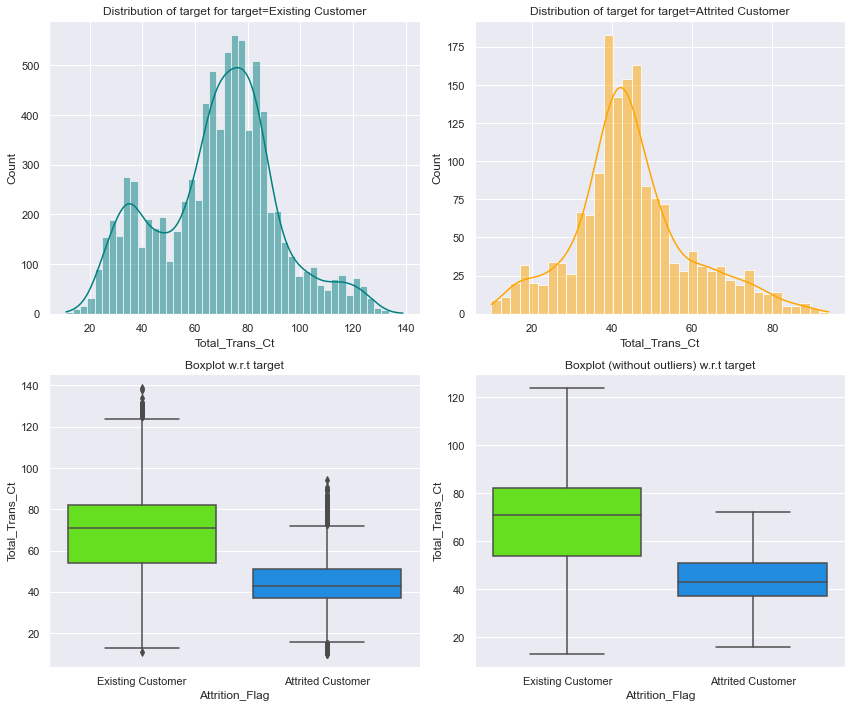

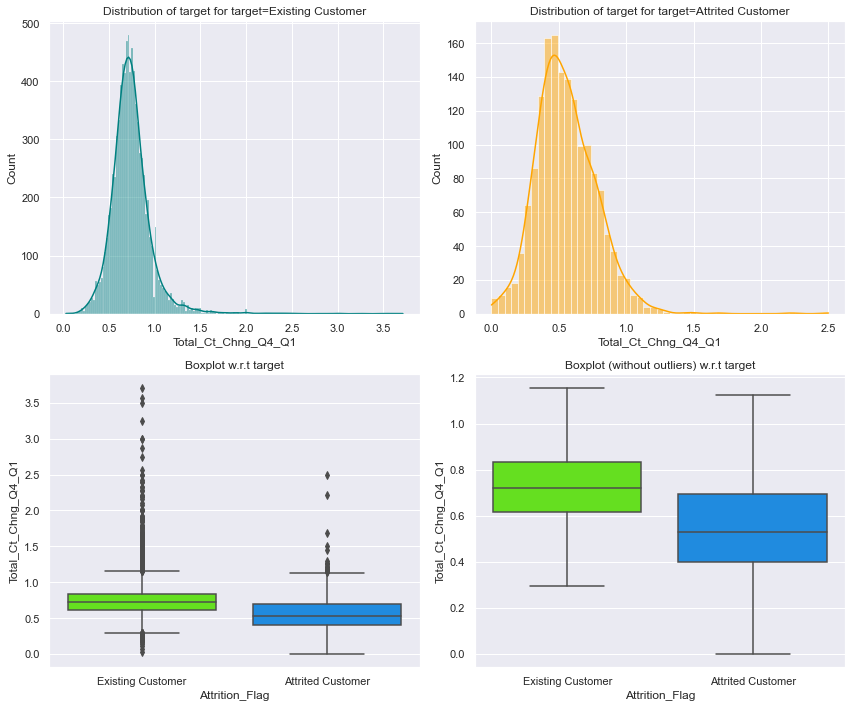

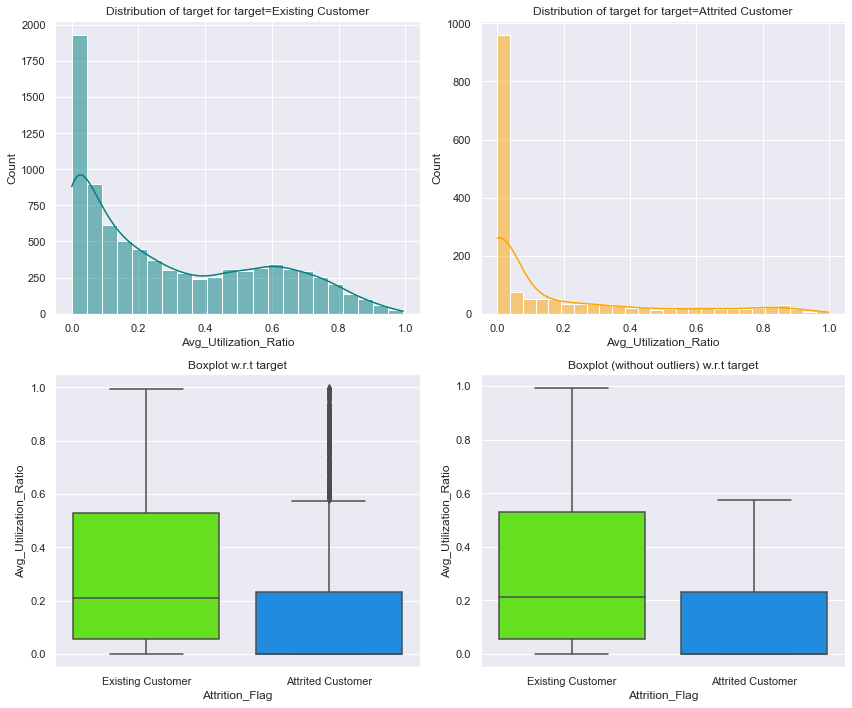

In [19]:
num_col = [x for x in cred_data.columns if cred_data[x].dtypes != "object"]
# print(num_col)
for col in cred_data[num_col]:
    distribution_plot_wrt_target(cred_data, col, "Attrition_Flag")

# Observations and Insights From EDA:

-	 1)  Numerical data distribution :


   -	 We can see that the customer number column has no normal distribution also its not providing any of the important relation with label variable from EDA, we can drop this column.
    
    -	 Columns like 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon' seems to be normal  distributed  with some outliers.
    
    -	Columns like Credit_Limit and Avg_open_to_buy are seemed to be right skewed with outliers.
    
    -	Columns like 'Total_Trans_Ct',  'Avg_Utilization_Ratio' have high number of outliers ,we need to check if we have to  drop this outlier  or this are genuine values 
    
    
 
-	2) Categorical data values:


    -	Data contains 83.9% of existing customers and 16.1% Attrited customers which show still bank has appropriate customers which it can save and server better.
    
  -	Most of the customers are Females (53%) with education level of graduate(31%) ,followed by high school and undergraduate 
    
    -Top customers marital_status for the customer is married (47%) followed by the singles.
    
   - Most of the credit  card holding customer  are in income Category of  <40K (35%)
    
   -	Out of all the Card_Category Blue is the most prominent one with 93% of all customters.

-	3)Customers Profiling: 

   -	Customers with Maritial status married  and single ,with avg age 40-55 years has  near bout same attrition rate ,but customers with Marritial_staus Divorced  and Male with avg age 45>  has higher attrition rate as compare to Female customers with some outliers.

    -	Also pattern for the female show high Avg_utilization_Ratio as compare to the male counterpart. 	

    -	From the Stack plot we can see that the Doctorate and Higher income customers’ attrition rate is more.

    -	Also Platinum card holder customer’s attrition rate is more, bank should check the fees or other services for this card type.
    	
    -	Total_transation_ct and total_transaction_count,Cutomer_Age and Month_on_book has very high co-relation followed by total_Revolving_Bal and Avg._utilization_ratio.
    
    - 'Total_Trans_Ct',  'Avg_Utilization_Ratio','Months_Inactive_12_mon', 'Contacts_Count_12_mon' is very low for attried Customers  as compair to existing customers,bank should track  this customer and provide some assistance or deals 


# Feature  Engineering :

In [20]:
# Dropping the Client  number  as its not porviding nay significant value to lable and distribution

cred_data.drop('CLIENTNUM',inplace=True,axis=1)



# Missing values and undefine data columns:

In [21]:
#Column  Income_Category has some missing/wrong values as "abc" we need to  trea these values
print(cred_data[['Marital_Status']].value_counts())
print(cred_data[['Income_Category']].value_counts())
print(cred_data[['Education_Level']].value_counts())




Marital_Status
Married           4687
Single            3943
Divorced           748
dtype: int64
Income_Category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
abc                1112
$120K +             727
dtype: int64
Education_Level
Graduate           3128
High School        2013
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64


In [22]:
#replacing the values for the KNN imputer 
#data_bkp2=cred_data.copy()

col_to_impute=['Marital_Status','Income_Category','Education_Level']

Marital_Status={"Married":1 ,"Single":2,"Divorced":3}
cred_data['Marital_Status']=cred_data['Marital_Status'].replace(Marital_Status).astype(float)



In [23]:
cred_data["Marital_Status"].value_counts()

1.0    4687
2.0    3943
3.0     748
Name: Marital_Status, dtype: int64

In [24]:
Income_Category = {
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$80K - $120K": 3,
    "$60K - $80K": 4,
    "$120K +": 5,
}

In [25]:
print(cred_data["Income_Category"].isna().sum())

cred_data['Income_Category']=cred_data['Income_Category'].replace(Income_Category)


0


In [26]:
# Education category

Education_Level={"Uneducated":0 ,"High School":1,"College":2,"Graduate":3,"Post-Graduate":4,
                "Doctorate":5}
cred_data['Education_Level']=cred_data['Education_Level'].replace(Education_Level).astype(float)




In [27]:
print(cred_data[["Marital_Status"]].value_counts())
print(cred_data[["Income_Category"]].value_counts())
print(cred_data[["Education_Level"]].value_counts())
cred_data.loc[cred_data["Income_Category"] == "abc", "Income_Category"] = np.nan

Marital_Status
1.0               4687
2.0               3943
3.0                748
dtype: int64
Income_Category
1                  3561
2                  1790
3                  1535
4                  1402
abc                1112
5                   727
dtype: int64
Education_Level
3.0                3128
1.0                2013
0.0                1487
2.0                1013
4.0                 516
5.0                 451
dtype: int64


In [28]:
#importing the KNN imputer for the missing values 

from sklearn.impute import KNNImputer

imputer =KNNImputer(n_neighbors=5)
cred_data[col_to_impute]=imputer.fit_transform(cred_data[col_to_impute])



In [29]:
# checking the missing values afte knn imputer
cred_data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Handling the outliers 

# Observations and Insights: 

- Most of the outliers are seems to be ok as per EDA and other data analysis .

- Only three  columns  Total_Amt_Chng_Q4_Q1,Total_Trans_Amt and Total_Trans_Ct    has some outliers which we can see but they are only one two .

- As we are  using decision tree algo as default for all modle predcitions these outliers are taken care by algo . 

#  Data Preperation for the Modeling :

In [30]:
X = cred_data.drop(["Attrition_Flag"], axis=1)

y = cred_data["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [31]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [32]:
# To tune model, get different metric scores and split data

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [33]:
# dividing the data for the three sets train,val and testing

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

In [34]:
# creating the dummy varibels for categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 21) (2026, 21) (2026, 21)


<IPython.core.display.Javascript object>

# Building the Model 

# Which case is more important?
- Predicting a customer who is going to  will leave their credit card services  and reson for the same so that bank can imporve their services

# How to reduce this loss i.e need to reduce False Negatives?
- Bank  would want Recall to be maximized, as bank dont want to loss any of their existing customers to be lost for credit card service, higher  Recall lesser the chances of false negatives and  bank lossing customer for credit card.

In [35]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [36]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [37]:
# defining a function to runmultiple modles  and calulate their performace
def All_Modle_perf(X_set, y_set):
    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("LogisticRegression", LogisticRegression(random_state=1)))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    models.append(("dtree", DecisionTreeClassifier(random_state=1)))

    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models

    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance:" "\n")

    for name, model in models:
        scoring = "recall"
        kfold = StratifiedKFold(
            n_splits=5, shuffle=True, random_state=1
        )  # Setting number of splits equal to 5
        cv_result = cross_val_score(
            estimator=model, X=X_set, y=y_set, scoring=scoring, cv=kfold
        )
        results.append(cv_result)
        names.append(name)
        print("{}: {}".format(name, cv_result.mean() * 100))

    print("\n" "Training Performance:" "\n")

    for name, model in models:
        model.fit(X_set, y_set)
        scores = recall_score(y_set, model.predict(X_set)) * 100
        print("{}: {}".format(name, scores))

        # Plotting boxplots for CV scores of all models defined above

    fig = plt.figure(figsize=(10, 7))

    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(111)
    ax.set_xticklabels(names)
    plt.boxplot(results)

    plt.show()

<IPython.core.display.Javascript object>


Cross-Validation Performance:

LogisticRegression: 44.461015175300886
Bagging: 78.89115646258503
Random forest: 77.04709576138147
GBM: 81.75876504447933
Adaboost: 81.14338042909472
Xgboost: 85.95970695970696
dtree: 78.48246991104133

Training Performance:

LogisticRegression: 48.87295081967213
Bagging: 98.46311475409836
Random forest: 100.0
GBM: 87.19262295081968
Adaboost: 84.52868852459017
Xgboost: 100.0
dtree: 100.0


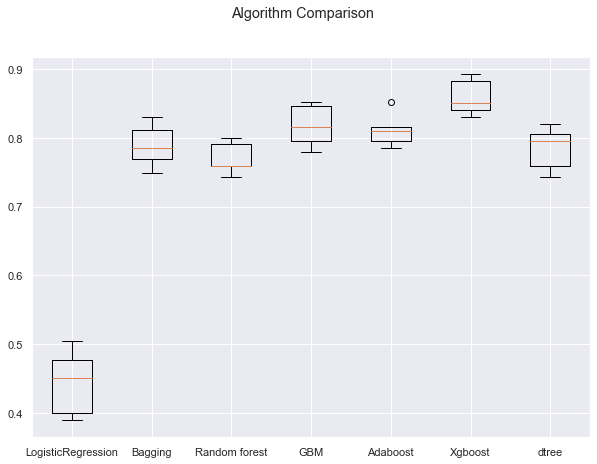

<IPython.core.display.Javascript object>

In [38]:
All_Modle_perf(X_train, y_train)

# Observations :

- We have build the 6 models to check the perofrmace  of each model on the Traning data and evalut the data on evalualtion set .

- It seems all the model are overfitted the evaluation data except, logistic regression,GBM and Adaboost classifier.

- out of the all 7 models  Adaboost classifiers performace look good and promising on both  train and validation data sets.

- we can use the hypertunning for  other models and see if they are working good after



#  Under sampling and over sampling data
#

In [39]:
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

 # Oversampling train data using SMOTE

In [40]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 21)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>


Cross-Validation Performance:

LogisticRegression: 80.54569070022515
Bagging: 96.54855779406955
Random forest: 98.21533991417961
GBM: 97.0386384190575
Adaboost: 95.62683522869403
Xgboost: 98.41139910331161
dtree: 94.95987992841887

Training Performance:

LogisticRegression: 81.97685820749166
Bagging: 99.78427142576976
Random forest: 100.0
GBM: 97.99960776622866
Adaboost: 96.23455579525397
Xgboost: 100.0
dtree: 100.0


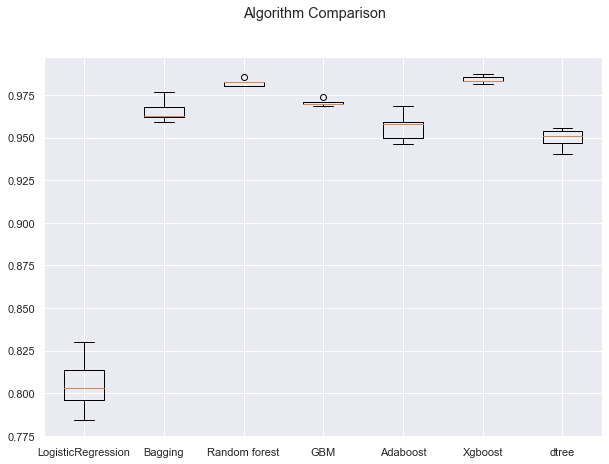

<IPython.core.display.Javascript object>

In [41]:
All_Modle_perf(X_train_over, y_train_over)

# Observations :
 
 - As we have the imbalance of the data for attrition and existing cutomers .
 
 - After uing the smote for oversampling the minority class ,we have evaluate the models and Xgboost is the best modle after oversampling  of the data.
 

#  Undersampling train data using Random Under Sampler

In [42]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 21)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>


Cross-Validation Performance:

LogisticRegression: 82.06855049712193
Bagging: 90.268969126112
Random forest: 94.26268969126113
GBM: 94.05808477237049
Adaboost: 93.44427001569858
Xgboost: 95.69754055468343
dtree: 88.72893772893772

Training Performance:

LogisticRegression: 78.79098360655738
Bagging: 99.38524590163934
Random forest: 100.0
GBM: 97.84836065573771
Adaboost: 95.28688524590164
Xgboost: 100.0
dtree: 100.0


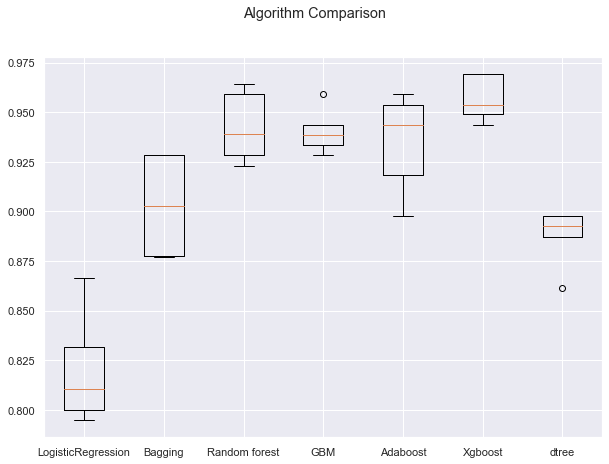

<IPython.core.display.Javascript object>

In [43]:
All_Modle_perf(X_train_un, y_train_un)


#  Observations :
- I have  also checked the under sampling of the data and again xgboost looks good comapir to other models .

- we can clearly see that  the Xgboost with over sampling has the best score as compair to the undersampling.

#  Hyper tunning the Model using GridserachCV

# what models i am choosing and why ?

- I am avoiding the Xgboost even its the best modle i got above ,due to computaion time for traing and cross validation .

- As per the observation on the above crossvalidation and training data ,i can gind three models Adaboost ,Randomforest and Bagging classifier are best to tune .

- These  models i am using Decision tree model as default base estimator ,to check different Hyperparamters ,as dtree also given good result on traing and cross validation data set.


# AdaBoostClassifier: 

In [44]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [50,100,150],
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.05, 'n_estimators': 100} 
Score: 0.9533310242644653
Wall time: 1min 10s


<IPython.core.display.Javascript object>

In [45]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train_over, y_train_over
)
print("Training performance:")
Adaboost_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.969   0.975      0.964 0.970

<IPython.core.display.Javascript object>

In [47]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.948   0.883      0.811 0.846

<IPython.core.display.Javascript object>

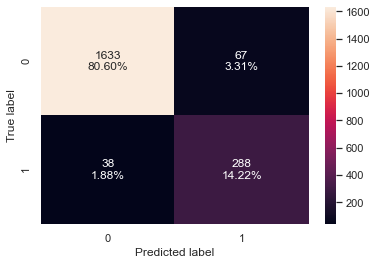

<IPython.core.display.Javascript object>

In [48]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

#  BaggingClassifier

In [49]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [50, 100, 150],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

In [50]:
# building model with best parameters
bagging_tuned1 = BaggingClassifier(
    max_features=0.8, max_samples=0.9, n_estimators=100, random_state=1
)
# Fit the model on training data
bagging_tuned1.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

In [51]:
# Calculating different metrics on train set
bagging_grid_train = model_performance_classification_sklearn(
    bagging_tuned1, X_train_over, y_train_over
)
print("Training performance:")
bagging_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

In [52]:
# Calculating different metrics on validation set
bagging_grid_val = model_performance_classification_sklearn(
    bagging_tuned1, X_val, y_val
)
print("Validation performance:")
bagging_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.961   0.911      0.853 0.881

<IPython.core.display.Javascript object>

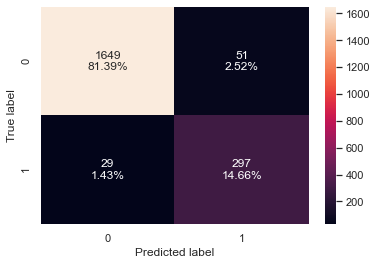

<IPython.core.display.Javascript object>

In [53]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned1, X_val, y_val)

#    RandomForestClassifier


In [54]:
%%time
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {"n_estimators": [50,100,150],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
               }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs = -1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train_over, y_train_over)

Wall time: 3min 46s


RandomForestClassifier(max_features=0.30000000000000004, max_samples=0.5,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

In [55]:
# building model with best parameters
Random_tuned1 = RandomForestClassifier(
    max_features=0.30000000000000004,
    max_samples=0.5,
    min_samples_leaf=5,
    n_estimators=150,
    random_state=1,
)

# Fit the model on training data
Random_tuned1.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=0.30000000000000004, max_samples=0.5,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
   Accuracy  Recall  Precision    F1
0     0.982   0.990      0.974 0.982
Validation performance:
   Accuracy  Recall  Precision    F1
0     0.951   0.902      0.812 0.855


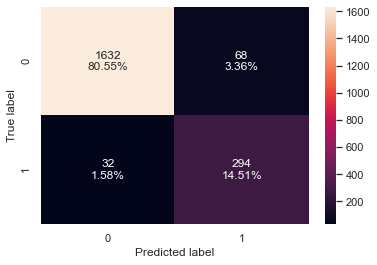

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on train set
Random_grid_train = model_performance_classification_sklearn(
    Random_tuned1, X_train_over, y_train_over
)
print("Training performance:")
print(Random_grid_train)


# Calculating different metrics on validation set
Random_grid_val = model_performance_classification_sklearn(Random_tuned1, X_val, y_val)
print("Validation performance:")
print(Random_grid_val)


# creating confusion matrix
confusion_matrix_sklearn(Random_tuned1, X_val, y_val)

# Observation:  

- As Xgboost was taking very high computation time i have chooes the  AdaBoost ,Bagging  and Randomforest classifiers with over sampled Data with SMOTE.

- After comparing the performace of hyepertunned models with GrideSerachCV  Adaboost with Oversampled data using SMOTE  is the one giving best performance as compair to the other two moldes .

- Recall for the  bagging Classifier is 91% with accuracy of 96% .

# RandomSearch CV

# AdaBoostClassifier

In [57]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [50,100,150],
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9533310242644653:
Wall time: 1min 5s


<IPython.core.display.Javascript object>

In [58]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [59]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.969   0.975      0.964 0.970

<IPython.core.display.Javascript object>

In [60]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.948   0.883      0.811 0.846

<IPython.core.display.Javascript object>

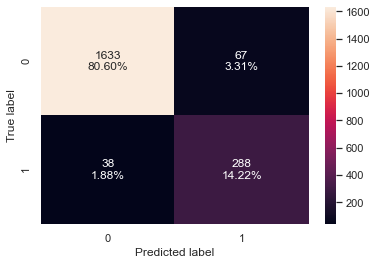

<IPython.core.display.Javascript object>

In [61]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

# BaggingClassifier

In [62]:
# # Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(
    estimator=bagging_estimator_tuned,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

randomized_cv = randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [63]:
# building model with best parameters
Bagging_tuned2 = BaggingClassifier(
    max_features=0.8, max_samples=0.9, n_estimators=50, random_state=1
)

# Fit the model on training data
Bagging_tuned2.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [64]:
# Calculating different metrics on train set
Bagging_random_train = model_performance_classification_sklearn(
    Bagging_tuned2, X_train_over, y_train_over
)
print("Training performance:")
Bagging_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

In [65]:
# Calculating different metrics on validation set
Bagging_random_val = model_performance_classification_sklearn(
    Bagging_tuned2, X_val, y_val
)
print("Validation performance:")
Bagging_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.954   0.865      0.852 0.858

<IPython.core.display.Javascript object>

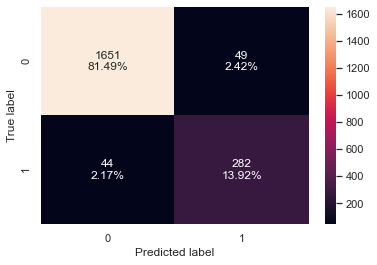

<IPython.core.display.Javascript object>

In [66]:
# creating confusion matrix
confusion_matrix_sklearn(Bagging_tuned2, X_val, y_val)

# RandomForestClassifier

In [67]:
%%time
# Choose the type of classifier. 
rf_estimator_tuned2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {"n_estimators": [50,100,150],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
               }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(
    estimator=rf_estimator_tuned2,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

randomized_cv = randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
Random2_estimator_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
Random2_estimator_tuned.fit(X_train_over, y_train_over)

Wall time: 41.5 s


RandomForestClassifier(max_features=0.30000000000000004,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       random_state=1)

<IPython.core.display.Javascript object>

In [68]:
# building model with best parameters
RandomForest_tuned2 = RandomForestClassifier(
    max_features=0.30000000000000004,
    max_samples=0.6000000000000001,
    min_samples_leaf=5,
    random_state=1,
)

# Fit the model on training data
RandomForest_tuned2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=0.30000000000000004,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       random_state=1)

<IPython.core.display.Javascript object>

In [69]:
# Calculating different metrics on train set
RandomForest_random_train = model_performance_classification_sklearn(
    RandomForest_tuned2, X_train_over, y_train_over
)
print("Training performance:")
RandomForest_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.986   0.993      0.979 0.986

<IPython.core.display.Javascript object>

In [70]:
# Calculating different metrics on validation set
RandomForest_random_val = model_performance_classification_sklearn(
    RandomForest_tuned2, X_val, y_val
)
print("Validation performance:")
RandomForest_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.949   0.899      0.807 0.851

<IPython.core.display.Javascript object>

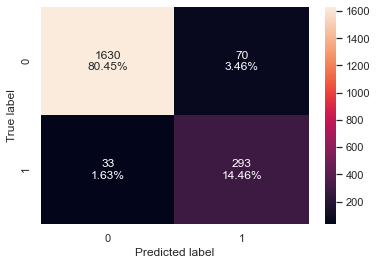

<IPython.core.display.Javascript object>

In [71]:
# creating confusion matrix
confusion_matrix_sklearn(RandomForest_tuned2, X_val, y_val)

# Observations: 
- i have choosen  the  AdaBoost ,Bagging  and Randomforest classifiers.

- After comparing the performace of hyepertunned models with RandomizedSearchCV   Randomforest  is the one giving best performance as compair to the other two moldes .

- Recall for the  Adaboost is 90% with accuracy of 94% .

# Comparing all models with Metrix values and Data Sets

In [72]:
# training performance comparison for Tunned model for Grid and random search

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        bagging_grid_train.T,
        Bagging_random_train.T,
        Random_grid_train.T,
        RandomForest_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Bagging Tuned with Grid search",
    "Bagging Tuned with Random Search",
    "RandomForest Tuned with Grid search",
    "RandomForest Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost Tuned with Grid search  AdaBoost Tuned with Random search  \
Accuracy                             0.969                              0.969   
Recall                               0.975                              0.975   
Precision                            0.964                              0.964   
F1                                   0.970                              0.970   

           Bagging Tuned with Grid search  Bagging Tuned with Random Search  \
Accuracy                            1.000                             1.000   
Recall                              1.000                             1.000   
Precision                           1.000                             1.000   
F1                                  1.000                             1.000   

           RandomForest Tuned with Grid search  \
Accuracy                                 0.982   
Recall                                   0.990   
Precision                                0.974   
F1                                       0.982   

           RandomForest Tuned with Random Search  
Accuracy                                   0.986  
Recall                                     0.993  
Precision                                  0.979  
F1                                         0.986

<IPython.core.display.Javascript object>

In [73]:
# Validation  performance comparison for Tunned model for Grid and random search

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        bagging_grid_val.T,
        Bagging_random_val.T,
        RandomForest_random_val.T,
        Random_grid_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Bagging Tuned with Grid search",
    "Bagging Tuned with Random Search",
    "RandomForest Tuned with Grid search",
    "RandomForest Tuned with Random Search",
]
print("Validation  performance comparison:")
models_train_comp_df

Validation  performance comparison:


AdaBoost Tuned with Grid search  AdaBoost Tuned with Random search  \
Accuracy                             0.948                              0.948   
Recall                               0.883                              0.883   
Precision                            0.811                              0.811   
F1                                   0.846                              0.846   

           Bagging Tuned with Grid search  Bagging Tuned with Random Search  \
Accuracy                            0.961                             0.954   
Recall                              0.911                             0.865   
Precision                           0.853                             0.852   
F1                                  0.881                             0.858   

           RandomForest Tuned with Grid search  \
Accuracy                                 0.949   
Recall                                   0.899   
Precision                                0.807   
F1                                       0.851   

           RandomForest Tuned with Random Search  
Accuracy                                   0.951  
Recall                                     0.902  
Precision                                  0.812  
F1                                         0.855

<IPython.core.display.Javascript object>

# Observations :

- From the above table we can clearly see that  out of six models  required matrix Recall to minimize the False negative is high for the  Bagging Tuned with Grid search modle 91% with SMOTE over sample.

- Also  Bagging Tuned with Grid search the accuracy for the Modle is high 96%.

- of all the model tested Xgboost with oversampled data  and  Bagging Tuned with Grid search with SMOTE over sample are best modle whith hiest recall and accuracy.

- AS Xgboost is computationally  very expensive i will choose the Adaboost classifer as my production modle

# Best model and testing on the test set :

In [74]:
Bagging_random_test = model_performance_classification_sklearn(
    bagging_tuned1, X_test, y_test
)
print("Test performance:")
Bagging_random_test


Test performance:


Accuracy  Recall  Precision    F1
0     0.962   0.914      0.858 0.885

<IPython.core.display.Javascript object>

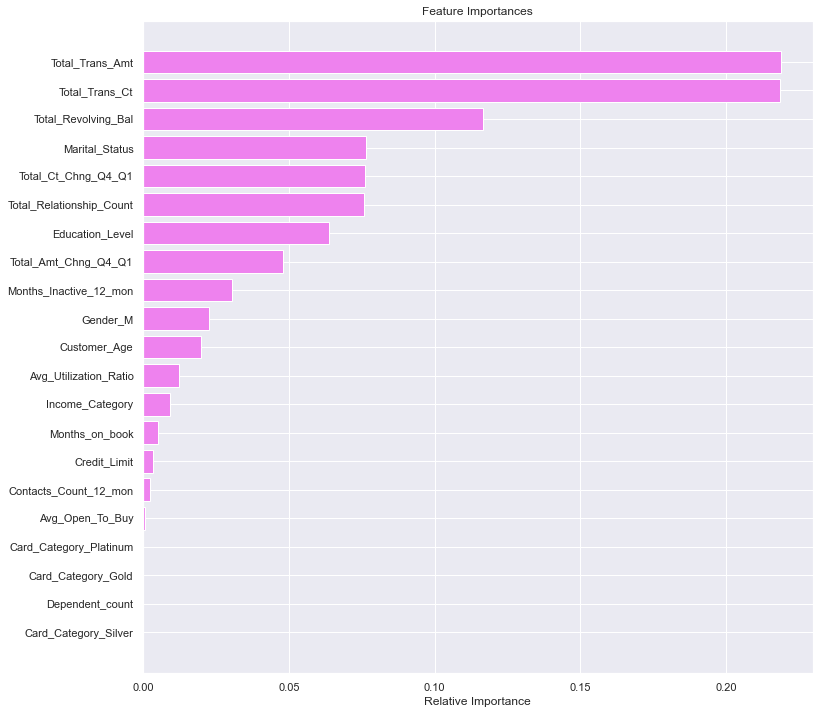

<IPython.core.display.Javascript object>

In [75]:
importances = adb_tuned1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train_over.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Observations: 

- We have tested the best model Bagging classifier with gridserachcv hypertune with SMOTE  modle on the Test data set and it giving the 93% recall and 96% accuracy which same as that of Evaluation data.

- Feature importance plot shows that the Total_trans_amt,Total_Trans_ct,total_Amt_chang_Q4_Q1 and total_Revolving_Bal are the very important features for the model

#  Productionizing the model

In [76]:
# Getting the numerical and categorical features first
cred_data_PRD = cred_data_bkp.copy()

<IPython.core.display.Javascript object>

In [77]:
cred_data_PRD

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School            NaN  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3     12691.000                  777   
1                          2      8256.000                  864   
2                          0      3418.000                    0   
3                          1      3313.000                 2517   
4                          0      4716.000                    0   
...                      ...           ...                  ...   
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0            11914.000                 1.335             1144              42   
1             7392.000                 1.541             1291              33   
2             3418.000                 2.594             1887              20   
3              796.000                 1.405             1171              20   
4             4716.000                 2.175              816              28   
...                ...                   ...     

<IPython.core.display.Javascript object>

In [78]:
cred_data_PRD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [79]:
X = cred_data_PRD.drop(["Attrition_Flag"], axis=1)

Y = cred_data_PRD["Attrition_Flag"].apply(
    lambda x: 1 if x == "Attrited Customer" else 0
)

<IPython.core.display.Javascript object>

In [80]:
# Missing value and imputation and feature enginnerng
#dropping the customer number of  as its of no importance

X.drop("CLIENTNUM",inplace=True,axis=1)

#selecting the columns for the imputations

col_to_impute=['Marital_Status','Income_Category','Education_Level']

Marital_Status={"Married":1 ,"Single":2,"Divorced":3}
X['Marital_Status']=X['Marital_Status'].replace(Marital_Status).astype(float)

Income_Category = {
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$80K - $120K": 3,
    "$60K - $80K": 4,
    "$120K +": 5,
}
X['Income_Category']=X['Income_Category'].replace(Income_Category)

Education_Level={"Uneducated":0 ,"High School":1,"College":2,"Graduate":3,"Post-Graduate":4,
                "Doctorate":5}
X['Education_Level']=X['Education_Level'].replace(Education_Level).astype(float)

X.loc[X["Income_Category"] == "abc", "Income_Category"] = np.nan

X["Income_Category"]=X["Income_Category"].astype(float)



<IPython.core.display.Javascript object>

In [81]:
#getting the numerical  and categorical columns from data frame
num_col=[]
cat_col=[]
for col in X.columns:
    if X[col].dtypes=="object":
        cat_col.append(col)
    else:
        num_col.append(col)


<IPython.core.display.Javascript object>

In [82]:
print(f" Numerical_col: {num_col}\n")
print(f" Category col: {cat_col}\n")

 Numerical_col: ['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

 Category col: ['Gender', 'Card_Category']



<IPython.core.display.Javascript object>

In [83]:
X.isna().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [84]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
from sklearn.impute import SimpleImputer

# importing the KNN imputer for the missing values

from sklearn.impute import KNNImputer


numerical_features = num_col
numeric_transformer = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=5))])

# creating a list of categorical variables

categorical_features = cat_col

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore")),]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

X.columns

In [85]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)


(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [86]:
X.isna().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [87]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Bagging",
            BaggingClassifier(
                max_features=0.8, max_samples=0.9, n_estimators=100, random_state=1
            ),
        ),
    ]
)


# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                  

<IPython.core.display.Javascript object>

In [88]:
# transforming and predicting on test data
predictions = model.predict(X_test)
print(pd.DataFrame(predictions))

      0
0     0
1     1
2     0
3     0
4     0
...  ..
3034  0
3035  0
3036  0
3037  0
3038  0

[3039 rows x 1 columns]


<IPython.core.display.Javascript object>

In [89]:
# Calculating different metrics on validation set
Bagging_Test_Grid = model_performance_classification_sklearn(model, X_test, y_test)
print("Final PRD  performance:")
Bagging_Test_Grid

Final PRD  performance:


Accuracy  Recall  Precision    F1
0     0.965   0.848      0.930 0.887

<IPython.core.display.Javascript object>

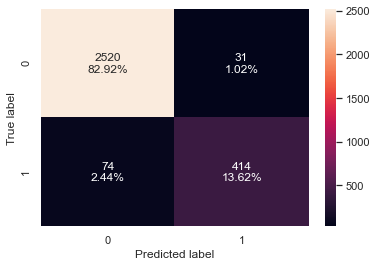

<IPython.core.display.Javascript object>

In [90]:
# creating confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

# Obseravation   :
 - i have Productionalize the modle and tested the accuracy and predictions it same as that to test and Val data.
 
 - i have prepare the script to manipulate the data before feeding to the  pipeline object and modle.
 
 - i have used KNN imputter and Onehot encoding to imput data and Bagging  classifier with grid search in pipe line object.
 
 

# #  Conclusion   and  Business Recommndations: 


-	Customers with Maritial status married  and single ,with avg age 40-55 years has  near bout same attrition rate ,but customers with Marritial_staus Divorced  and Male with avg age 45>  has higher attrition rate as compare to Female customers with some outliers.
	
-	Also pattern for the female show high Avg_utilization_Ratio as compare to the male counterpart. 	
	
-	From the Stack plot we can see that the Doctorate and Higher income customers’ attrition rate is more.

-	Most of the customers are Females (53%) with education level of graduate(31%) ,followed by high school and undergraduate 

-	Top customers marital_status for the customer is married (47%) followed by the singles.


-	Also Platinum card holder customer’s attrition rate is more, bank should check the fees or other services for this card type.
	
- We have  productionalize Bagging mdle with gridseachCV with SMOTE modle  which will help the bank to find the customer with Attrition and also key column like   Total_trans_amt,Total_Trans_ct,total_Amt_chang_Q4_Q1 and total_Revolving_Bal are the very important features for the model

- Bank can target  the Grduate and high school customer with some offers and special promotions .

- Bank can think of  to see the Fees structure  and service to Platinium card category and high income customers and preper campain fro them.

- Blue card Category customers are the one who are very important to bank with lover Salary  range ,bank think of offers  for such customers.

- Bank should check his policy and services for lngterm cutomers as most of the attried are long term with bank, bank create some campain and offers and rewards for the long term customers holding creditcards. 

- 'Total_Trans_Ct',  'Avg_Utilization_Ratio','Months_Inactive_12_mon', 'Contacts_Count_12_mon' is very low for attried Customers  as compair to existing customers,bank should track  this customer and provide some assistance or deals and services.